In [54]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

<Figure size 2600x600 with 0 Axes>

<Figure size 2600x600 with 0 Axes>

In [55]:
color5 = '#40010D'
color1 = '#F20519'
color6 = '#F28705'
color3 = '#2E40A6'
color2 = '#2976A6'
color4 = '#F2CB05'
color7 ='#85C8F2'
colors_list = [color1, color2, color3, color4, color5, color6, color7]

In [56]:
from urllib.request import urlretrieve

url = 'https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv'
# urlretrieve(url, 'police.csv')
url = 'https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv'
# urlretrieve(url, 'weather.csv')

## Preparing the data

- Examine the data🔍📊

- Clean the data🧹🔄


In [57]:
ri = pd.read_csv('police.csv') 
ri.head(2)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [58]:

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri['is_arrested'].astype('bool')


Check for Missing Values 🕵️‍♂️🔍


In [59]:
# Check for missing values in each column
missing_values = ri.isnull().sum()
missing_values

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested               0
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [60]:
# Display unique values in categorical columns
unique_values = ri.nunique()
unique_values

state                    1
stop_date             3757
stop_time             1431
county_name              0
driver_gender            2
driver_race              5
violation_raw           12
violation                6
search_conducted         2
search_type             25
stop_outcome             6
is_arrested              2
stop_duration            3
drugs_related_stop       2
district                 6
dtype: int64

Drop Columns with High Missing Values:


In [61]:
# Define the threshold for the percentage of missing values to consider a column for dropping
threshold = 0.8  # 80% threshold
# Drop columns with missing values exceeding the defined threshold
ri = ri.dropna(thresh=threshold * len(ri), axis=1)

ri

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,F,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,Warning,False,0-15 Min,False,Zone K3


Summary Statistics 📊📈


In [62]:
ri.describe()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
count,91741,91741,91741,86536,86539,86539,86539,91741,86539,91741,86539,91741,91741
unique,1,3757,1431,2,5,12,6,2,6,2,3,2,6
top,RI,2007-05-16,11:00,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X4
freq,91741,63,358,62762,61872,48424,48424,88434,77092,83461,69579,90879,24279


In [63]:
ri.dropna(subset=['driver_gender'], inplace=True)


In [64]:
ri.isnull().sum() 

state                 0
stop_date             0
stop_time             0
driver_gender         0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
district              0
dtype: int64

Convert Data Types:


In [65]:
# Remove duplicate rows
ri = ri.drop_duplicates()
ri

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,F,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,Warning,False,0-15 Min,False,Zone K3


Combine 'stop_date' and 'stop_time' columns into a new 'date_and_time' column


In [ ]:
ri['stop_datetime']= pd.to_datetime(ri['stop_date'] + ' ' + ri['stop_time'])

In [67]:
ri.dtypes

state                         object
stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

Setting the index


In [68]:
ri.set_index('stop_datetime', inplace=True)


# 📊🔍 Let's Analyze The Data


### Distribution of Violations:

- What are the most common types of violations in Rhode Island? 📊📉


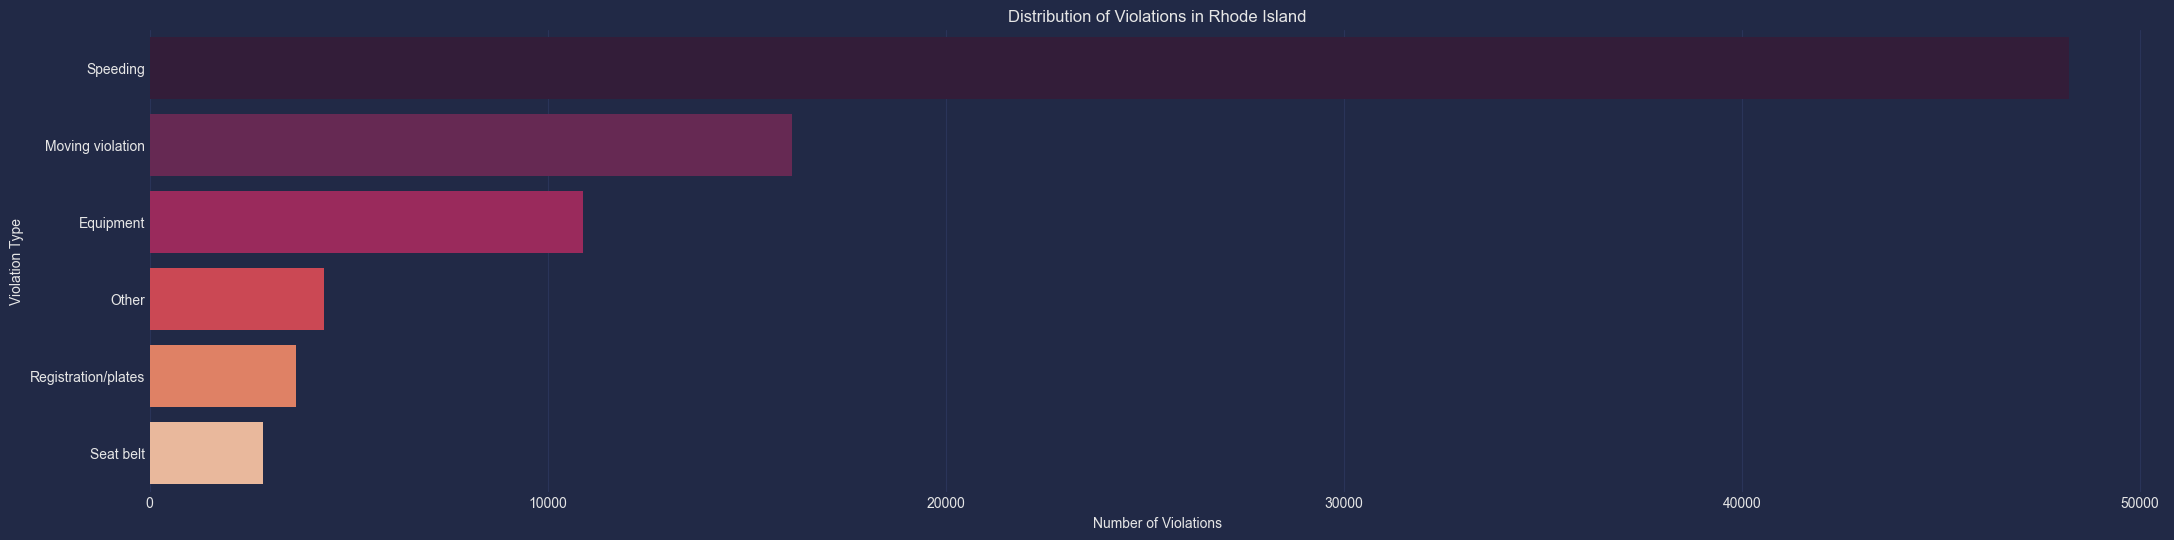

In [69]:
# Check the most common types of violations
top_violations = ri['violation'].value_counts().head(10)
plt.figure(figsize=(26, 6))
sns.countplot(y='violation', data=ri, order=top_violations.index, palette='rocket')
plt.title('Distribution of Violations in Rhode Island')
plt.xlabel('Number of Violations')
plt.ylabel('Violation Type')
plt.show()

## Arrests and Stop Outcomes:

🚨👮‍♂️ - What is the proportion of stops that result in arrests? 🤔

📊🔍 - How do the stop outcomes vary based on different violations? 📈


In [70]:
# Proportion of stops resulting in arrests
arrest_proportion = ri['is_arrested'].value_counts(normalize=True) * 100


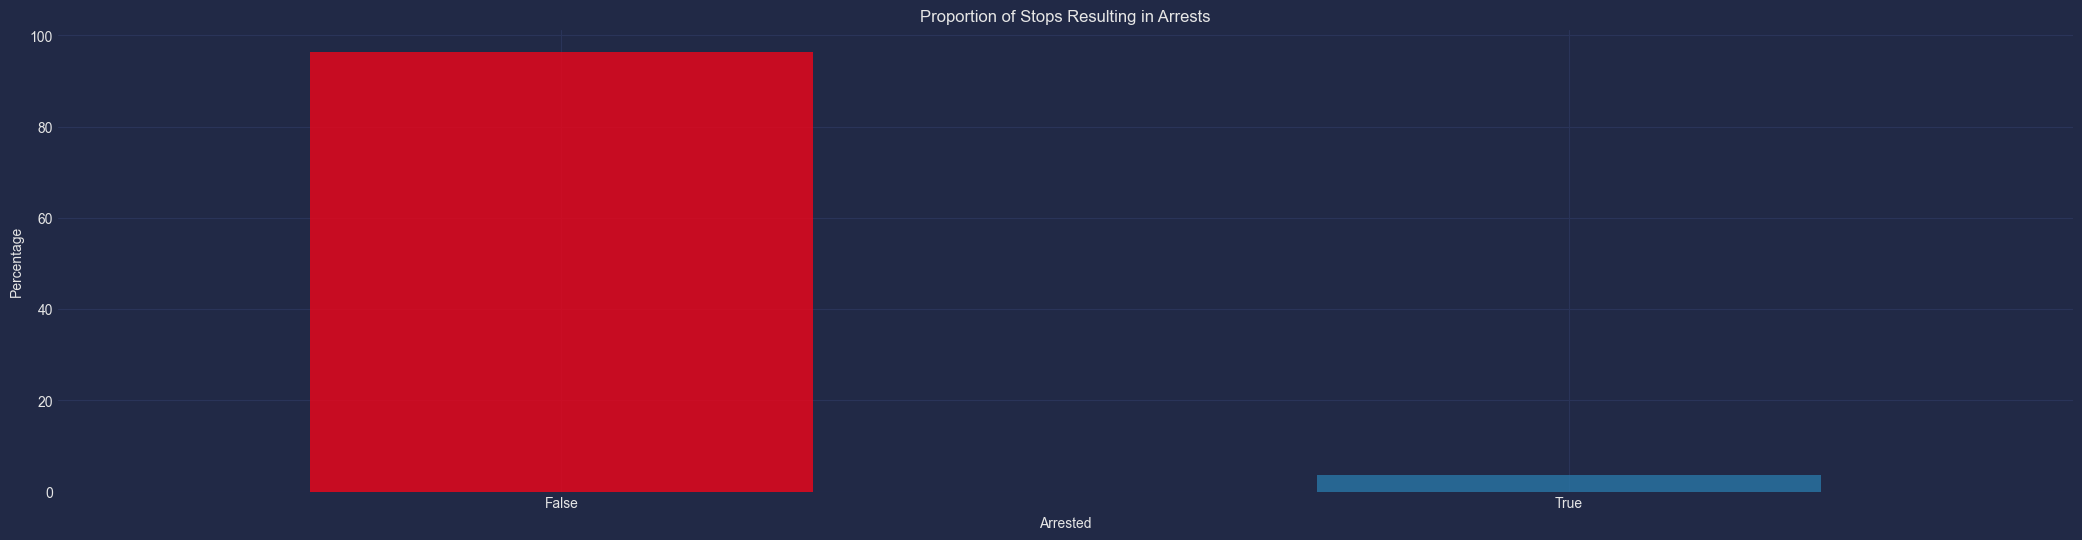

In [71]:
# Visualize the proportion of stops resulting in arrests
plt.figure(figsize=(26, 6))
arrest_proportion.plot(kind='bar', color=colors_list, alpha=0.8)
plt.title('Proportion of Stops Resulting in Arrests')
plt.xlabel('Arrested')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

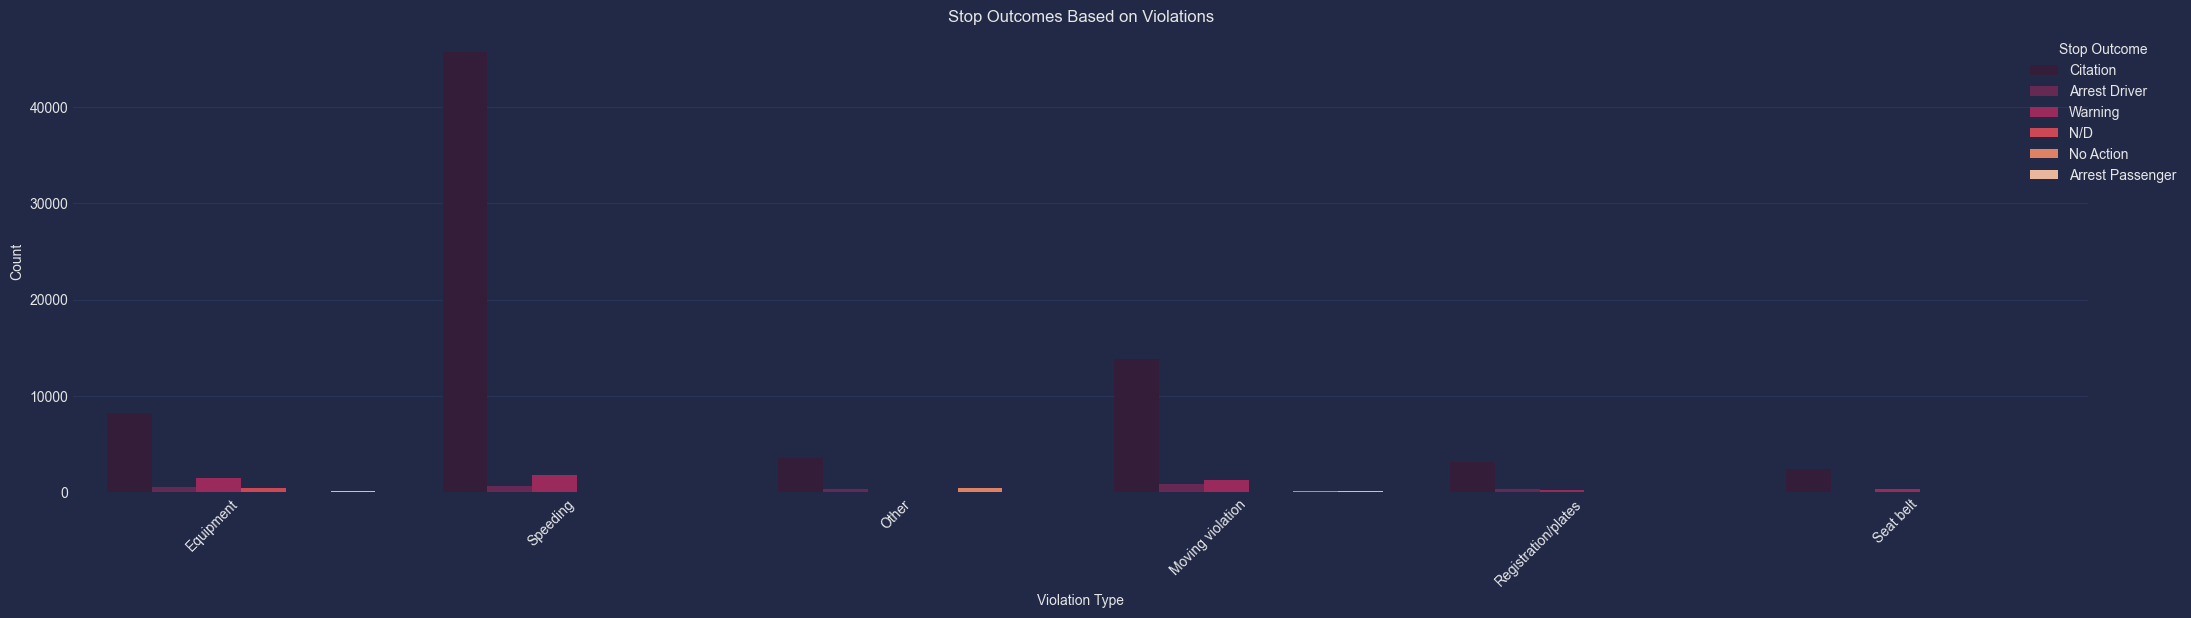

In [72]:
#Stop outcomes based on different violations
plt.figure(figsize=(26, 6))
sns.countplot(x='violation', hue='stop_outcome', data=ri,palette='rocket')
plt.title('Stop Outcomes Based on Violations')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stop Outcome', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

### Search Conducted:

🔍🚗 - How often are searches conducted during traffic stops in Rhode Island? 🤔

📊🔗 - Is there a correlation between the type of violation and the likelihood of a search? 📉


In [73]:
# Check the frequency of searches conducted during traffic stops
search_frequency = ri['search_conducted'].value_counts(normalize=True) * 100
search_frequency

False    96.176252
True      3.823748
Name: search_conducted, dtype: float64

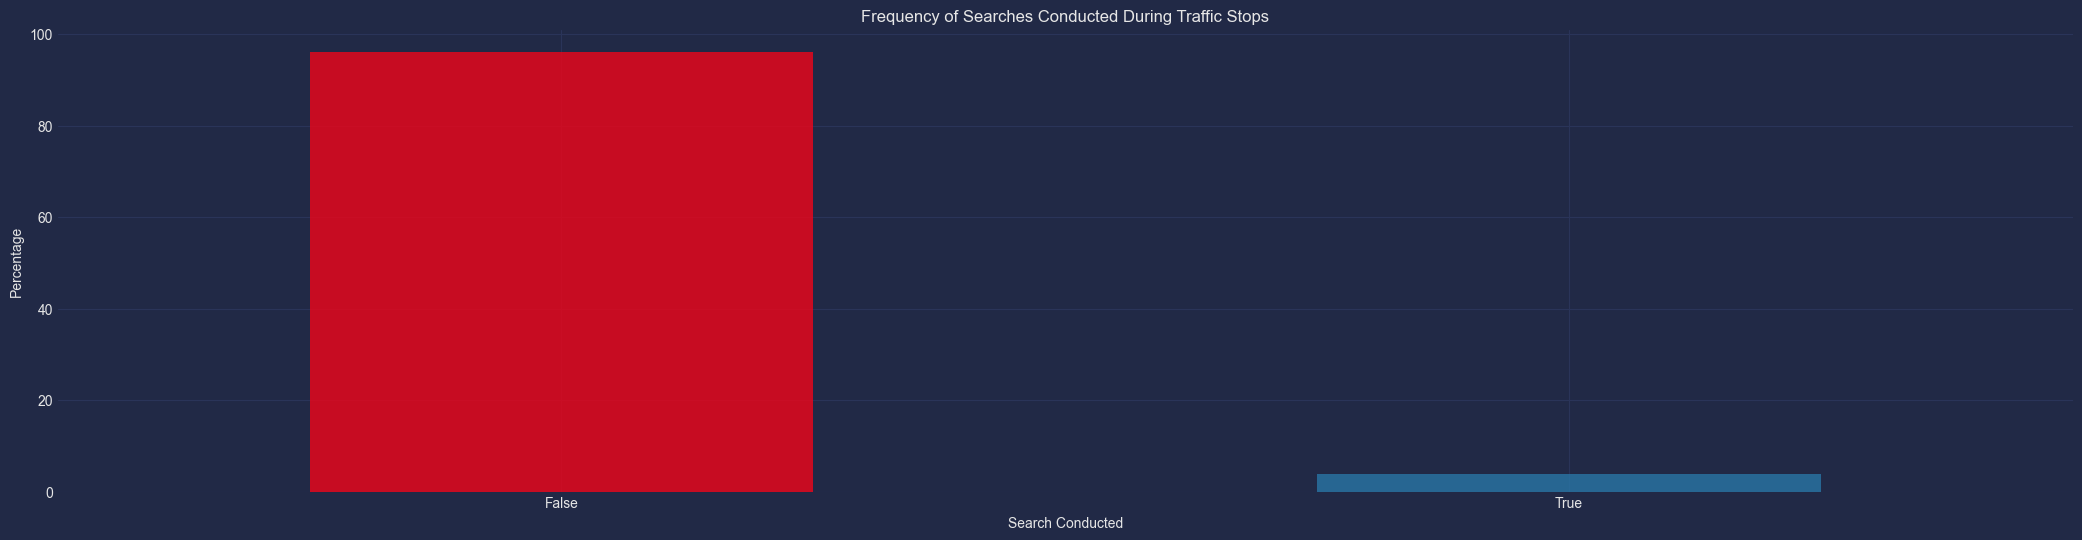

In [74]:
plt.figure(figsize=(26, 6))
# Visualize the frequency of searches conducted during traffic stops
search_frequency.plot(kind='bar', color=colors_list, alpha=0.8)
plt.title('Frequency of Searches Conducted During Traffic Stops')
plt.xlabel('Search Conducted')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

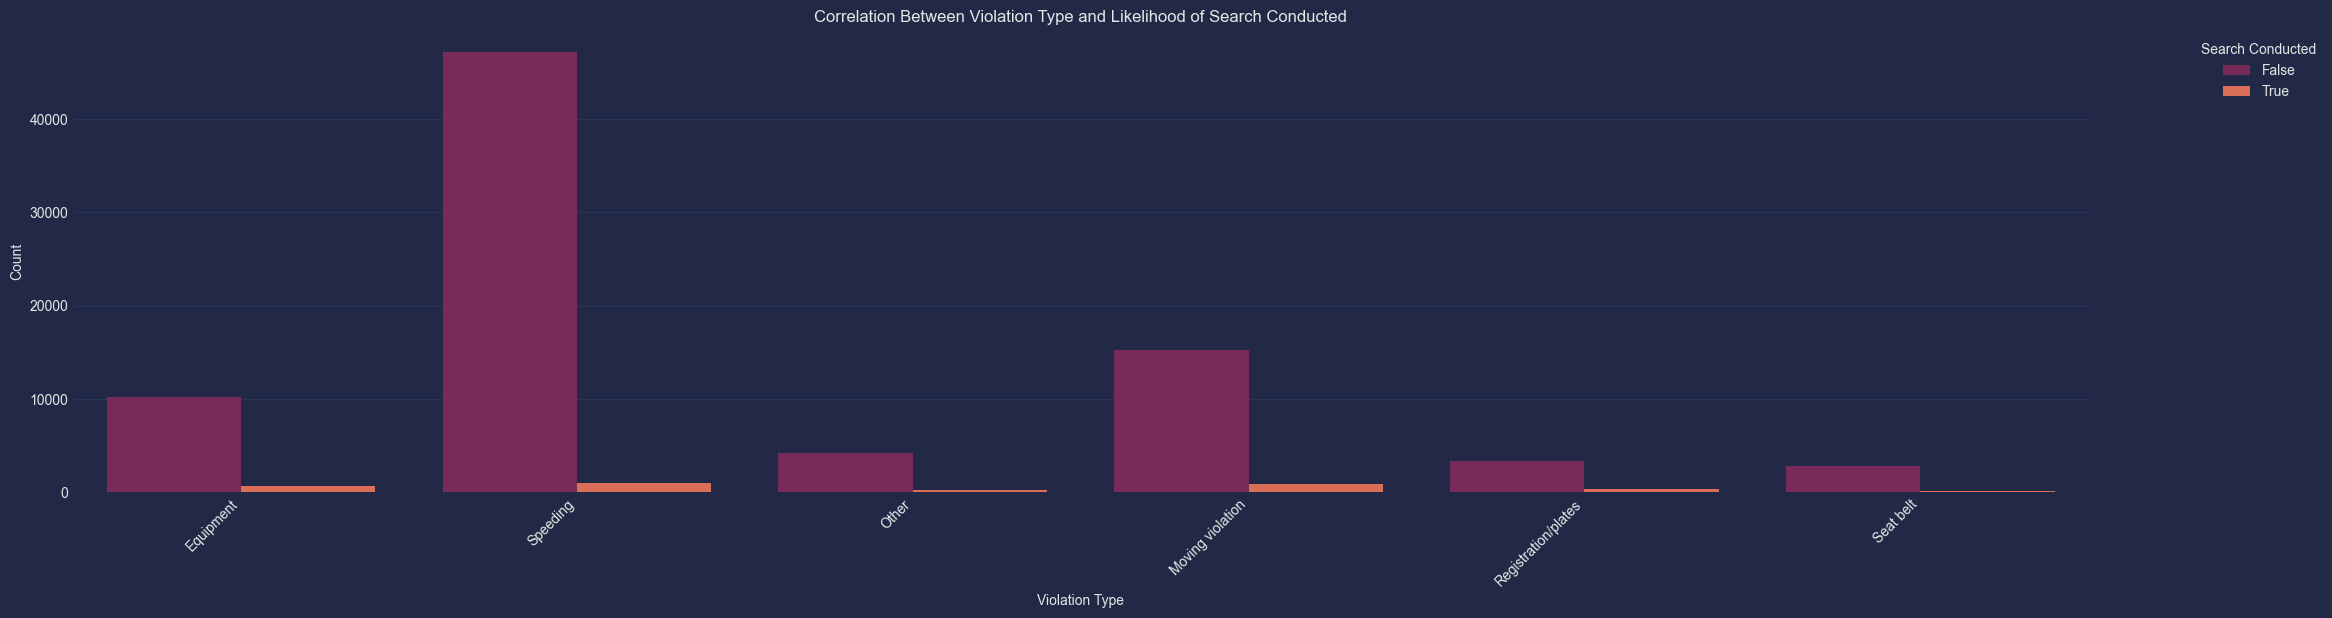

In [75]:
# Correlation between the type of violation and the likelihood of a search
plt.figure(figsize=(26, 6))
sns.countplot(x='violation', hue='search_conducted', data=ri, palette='rocket')
plt.title('Correlation Between Violation Type and Likelihood of Search Conducted')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Search Conducted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Comparing stop outcomes by driver_race:

- How do stop outcomes vary based on the driver's race?📊🚦


<Figure size 2600x600 with 0 Axes>

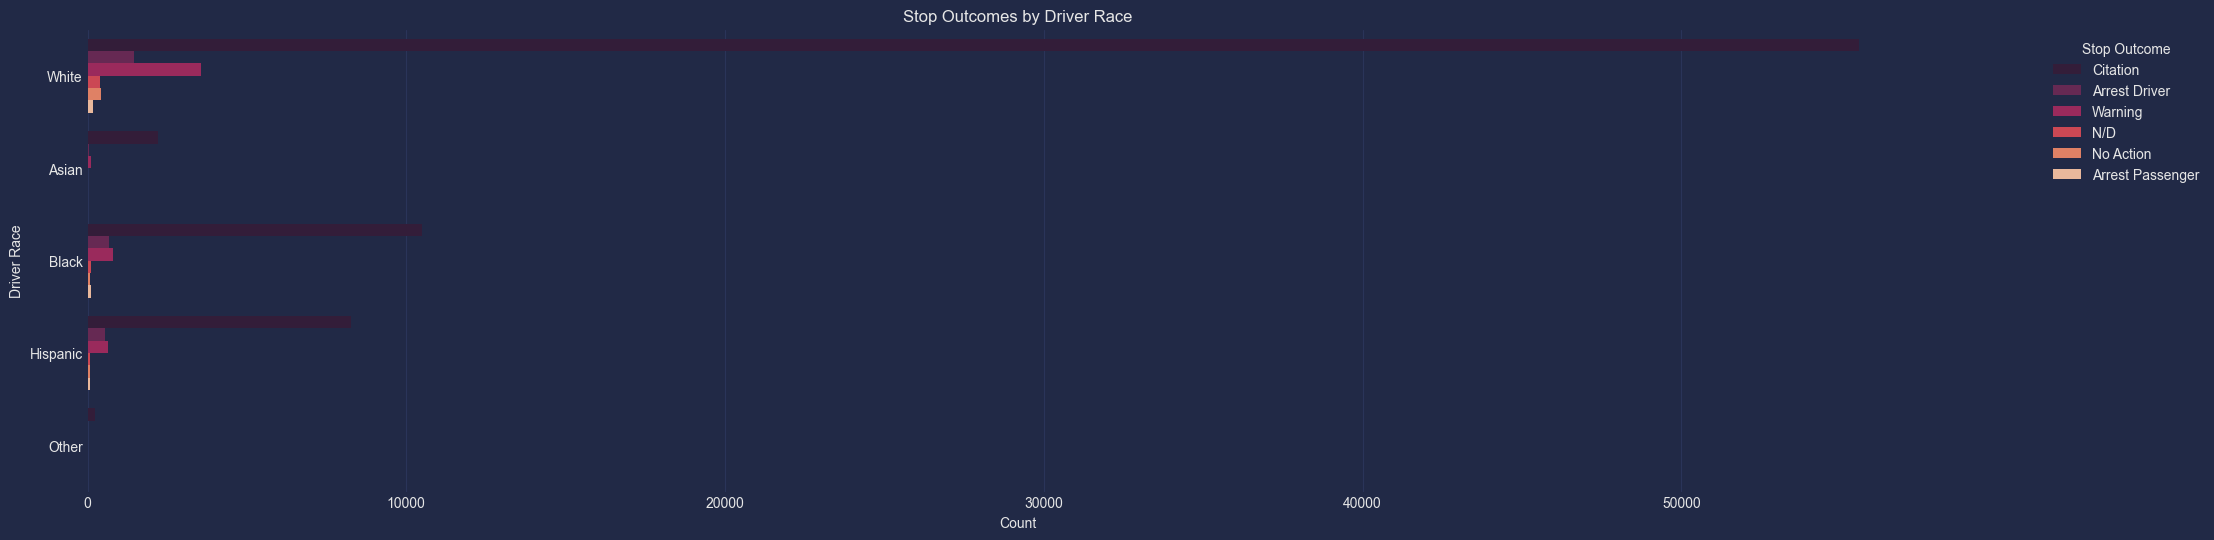

<Figure size 2600x600 with 0 Axes>

In [76]:
plt.figure(figsize=(24,6))
sns.countplot(y='driver_race', hue='stop_outcome', data=ri, palette='rocket')
plt.title('Stop Outcomes by Driver Race')
plt.xlabel('Count')
plt.ylabel('Driver Race')
plt.legend(title='Stop Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(26, 6))

### Does gender affect who gets a ticket for speeding?

- Explore the impact of gender on speeding ticket distribution.🚦👫


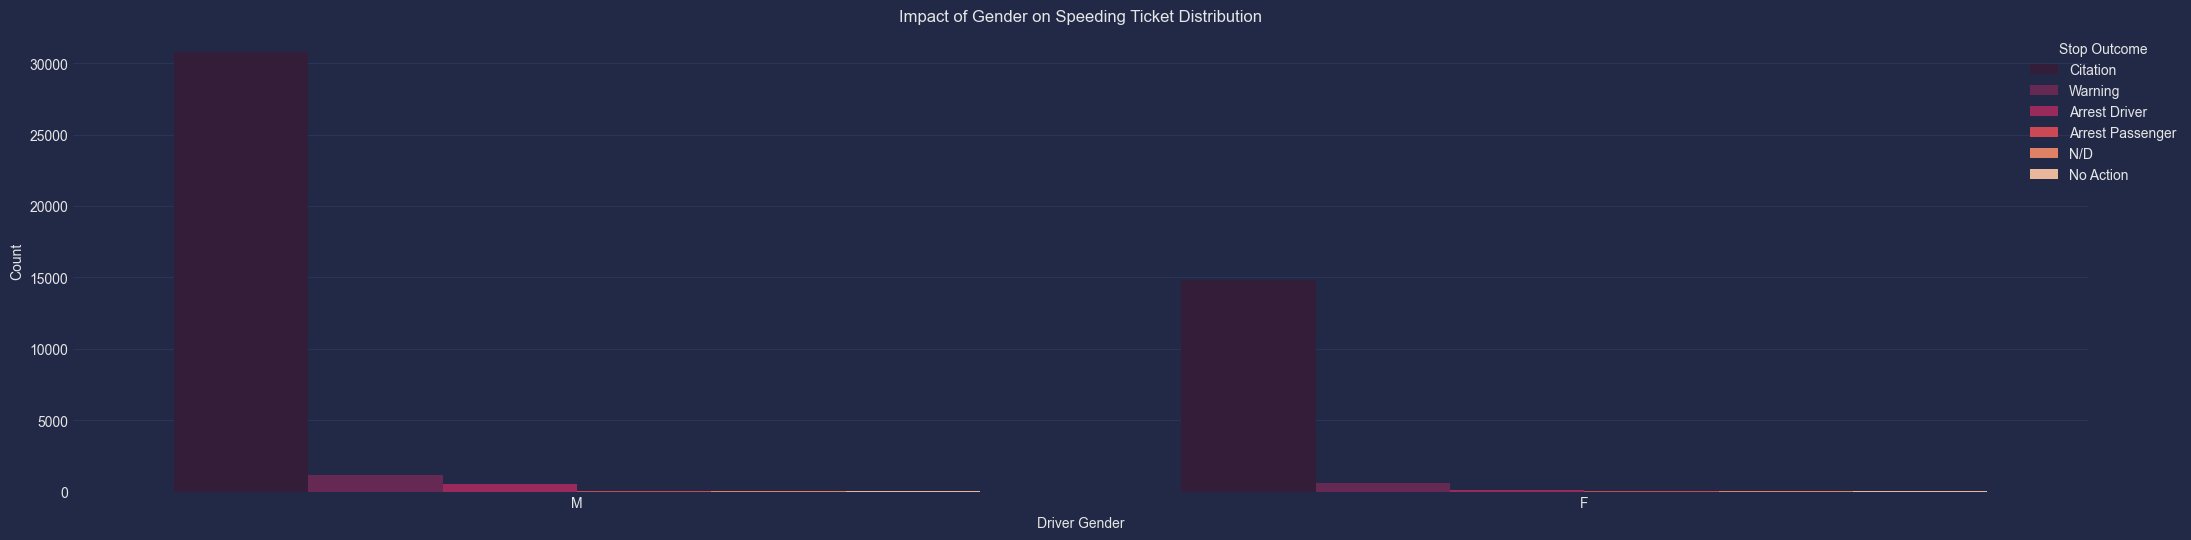

In [77]:
plt.figure(figsize=(26, 6))
# Filter data for speeding violations
speeding_data = ri[ri['violation'] == 'Speeding']

# Create a count plot to explore the impact of gender on speeding ticket distribution

sns.countplot(x='driver_gender', hue='stop_outcome', data=speeding_data, palette='rocket')
plt.title('Impact of Gender on Speeding Ticket Distribution')
plt.xlabel('Driver Gender')
plt.ylabel('Count')
plt.legend(title='Stop Outcome', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

### Does gender affect whose vehicle is searched?

- Investigate the influence of gender on vehicle searches.🚗🔍👫


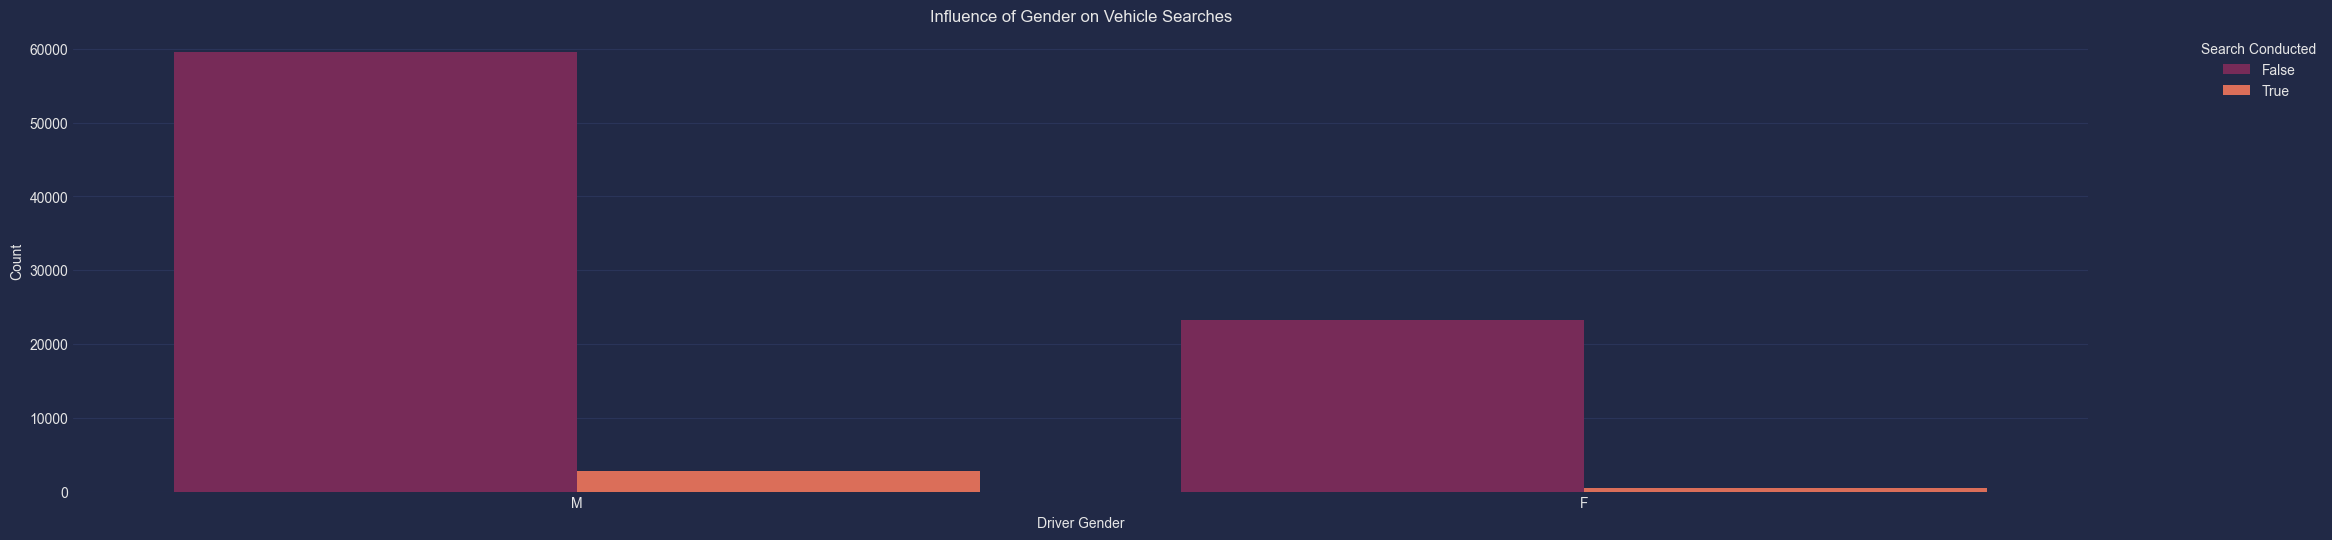

In [78]:
# Create a count plot to investigate the influence of gender on vehicle searches
plt.figure(figsize=(26, 6))
sns.countplot(x='driver_gender', hue='search_conducted', data=ri, palette='rocket')
plt.title('Influence of Gender on Vehicle Searches')
plt.xlabel('Driver Gender')
plt.ylabel('Count')
plt.legend(title='Search Conducted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Time Analysis:

- Are there specific times of the day when traffic stops are more frequent? 🕒🚦

- How does the duration of stops vary during different times of the day?🕰️⏱️


In [ ]:
# Convert 'stop_time' to datetime format
ri['stop_time'] = pd.to_datetime(ri['stop_time'])
ri['stop_date'] = pd.to_datetime(ri['stop_date'])

# Extract hour and minute from 'stop_time'
ri['hour'] = ri['stop_time'].dt.hour

ri.head()

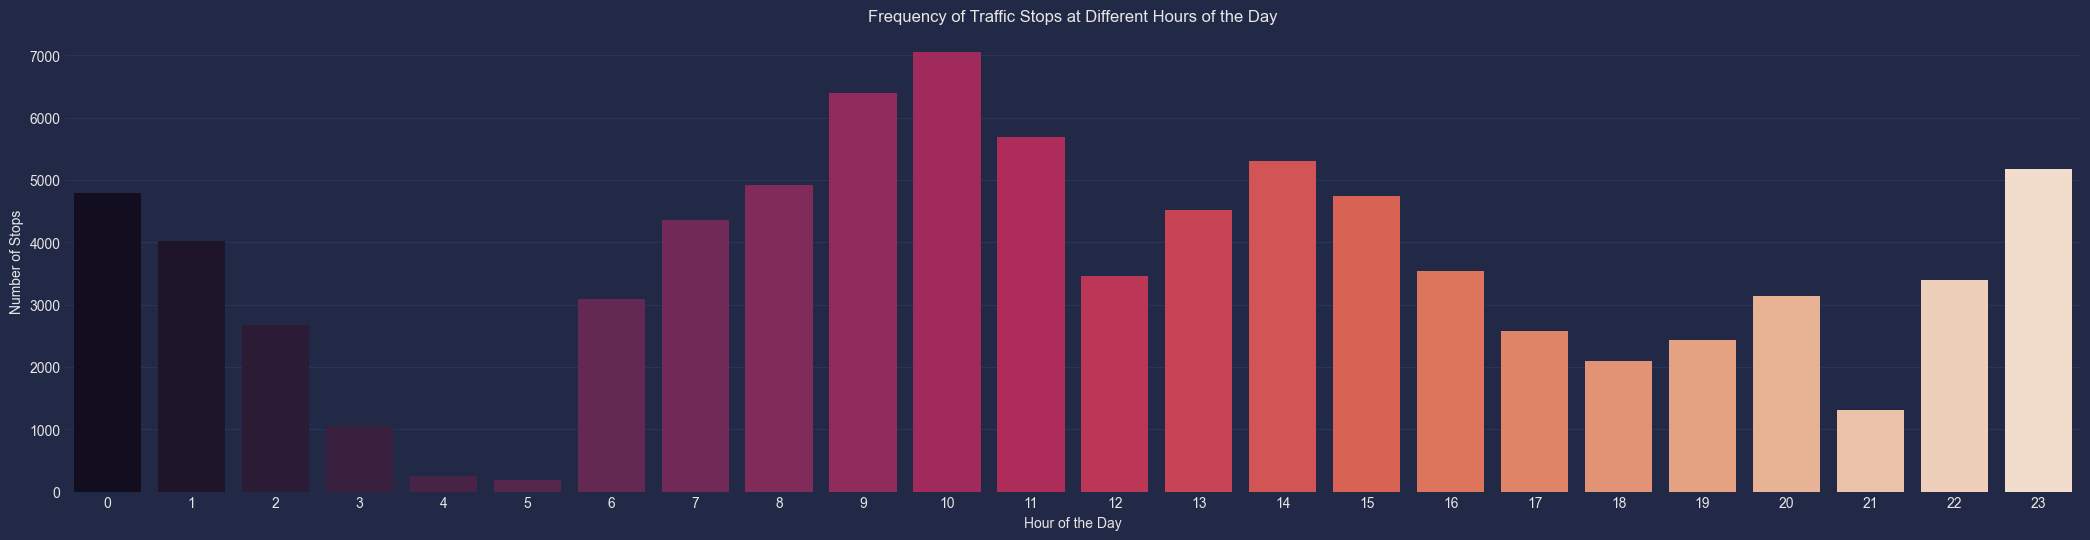

In [80]:
# Plotting the frequency of traffic stops at different hours
plt.figure(figsize=(26, 6))
sns.countplot(x='hour', data=ri, palette='rocket')
plt.title('Frequency of Traffic Stops at Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Stops')
plt.show()

#### Temporal Trends:

📆📊 - Investigate if there are any temporal trends in the data, such as changes in stop patterns over the years.

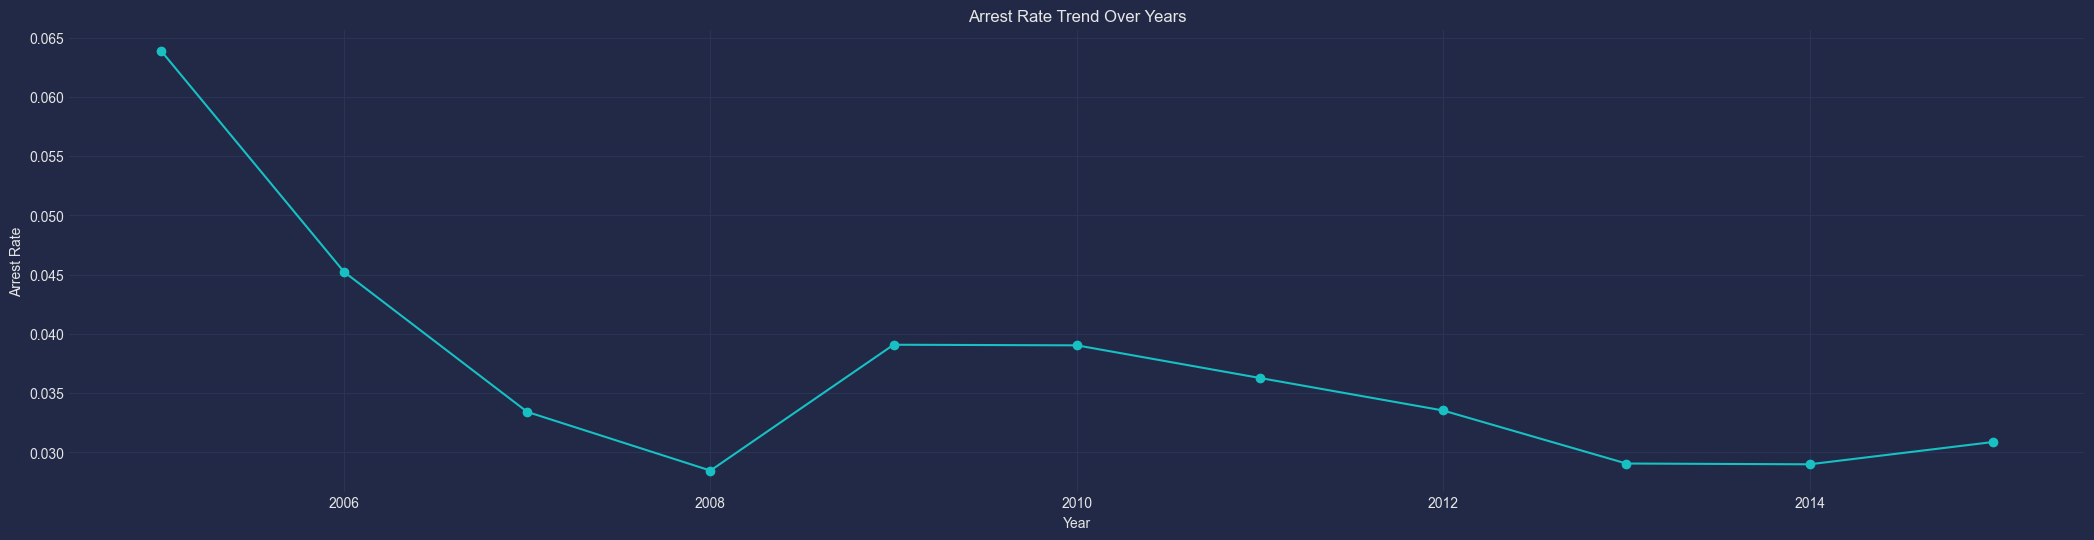

In [81]:
# Group by year and calculate metrics
annual_data = ri.groupby(ri['stop_date'].dt.year)['is_arrested'].mean()

# Plotting the trend over the years
plt.figure(figsize=(26, 6))
plt.plot(annual_data.index, annual_data.values, marker='o', linestyle='-')
plt.title('Arrest Rate Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.grid(True)
plt.show()


analyze the arrest rate by time of day


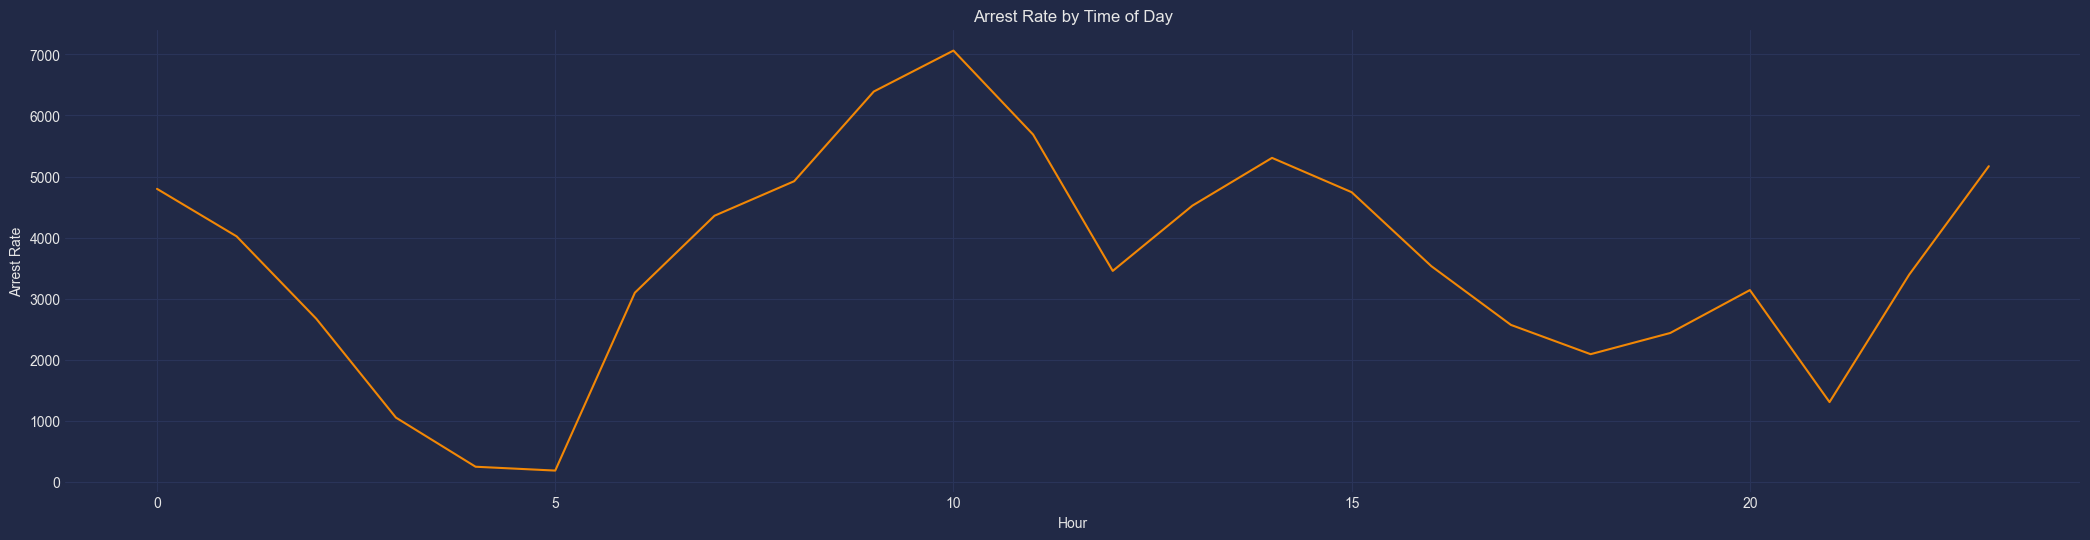

In [82]:

plt.figure(figsize=(26, 6))
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.count()
hourly_arrest_rate.plot(color= color6)

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

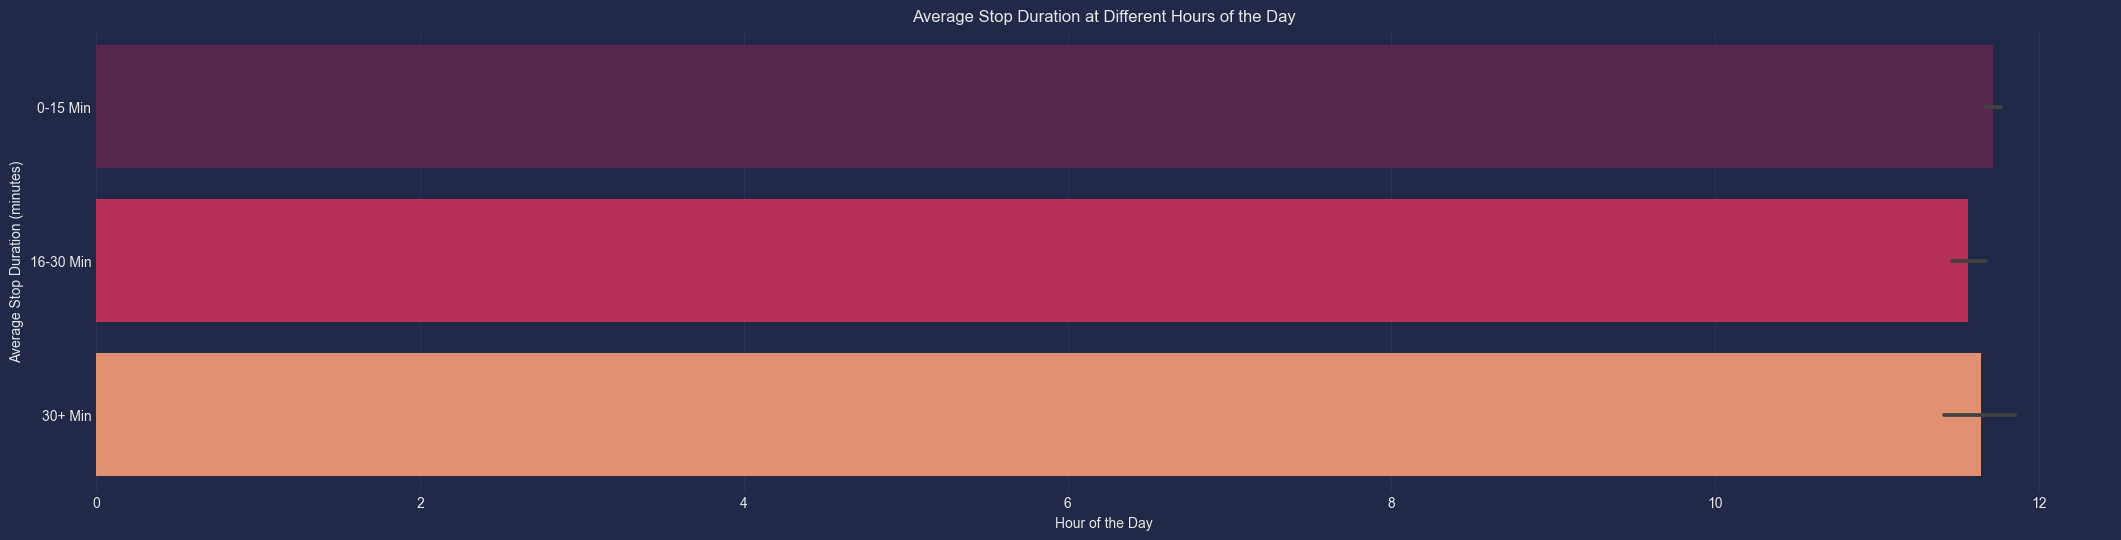

In [83]:
# Plotting the average stop duration at different hours
plt.figure(figsize=(26, 6))
sns.barplot(x='hour', y='stop_duration', data=ri, estimator='mean', palette='rocket')
plt.title('Average Stop Duration at Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Stop Duration (minutes)')
plt.show()

#### Plotting stop length:

📉⏳ - If you were stopped for a particular violation, how long might you expect to be detained?


In [ ]:

# Create a dictionary that maps stop_duration strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping' and store in 'stop_minutes'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

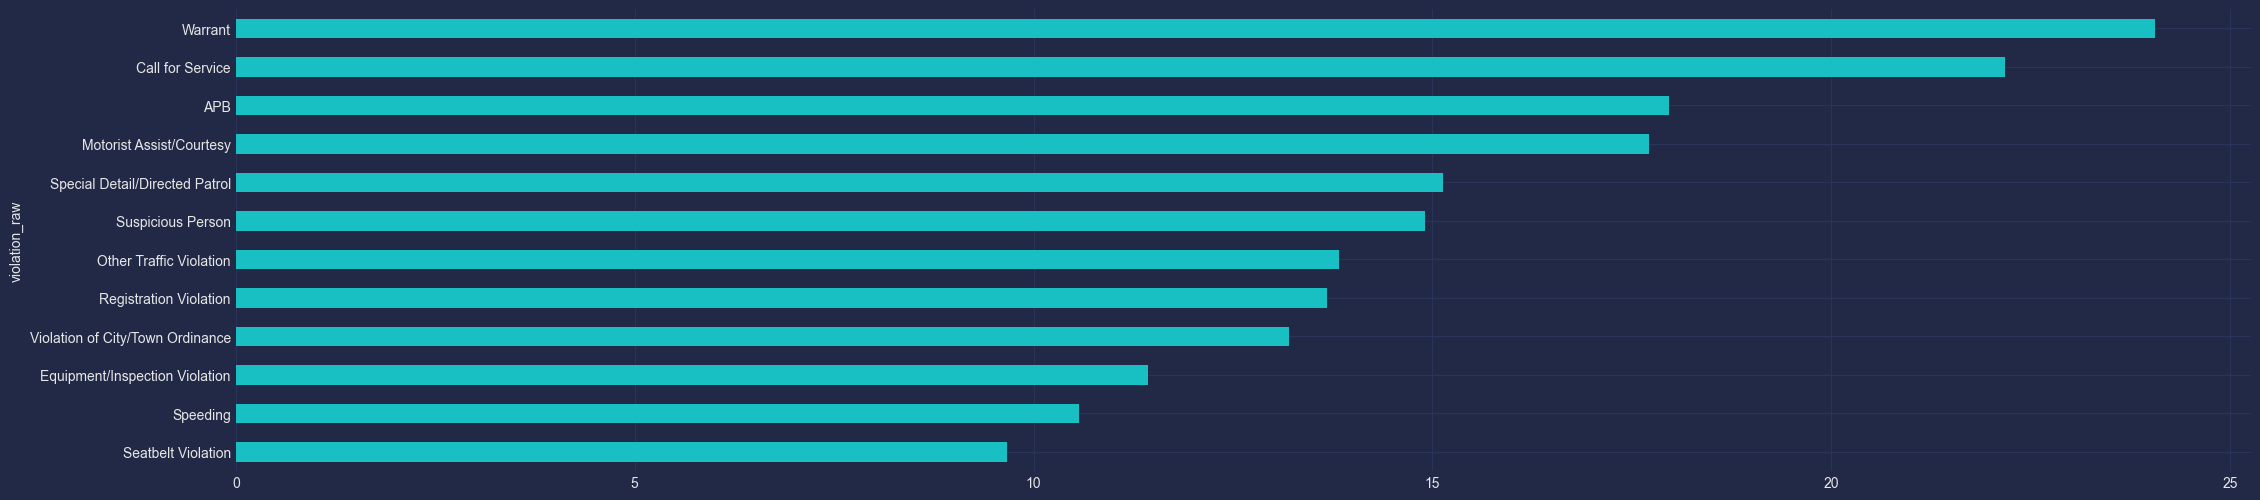

In [85]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
mean_stop_minutes = ri.groupby('violation_raw').stop_minutes.mean()

# Save the resulting Series as 'stop_length'
stop_length = mean_stop_minutes

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh',figsize=(26,6))

# Display the plot
plt.show()


### Drugs-Related Stops:

- Explore the frequency and outcomes of stops related to drugs 🚨💊

- Is there a pattern in the type of violations associated with drugs-related stops? 📊🔗


In [86]:
# Filter data for drug-related stops
drug_related_stops = ri[ri['drugs_related_stop'] == True]

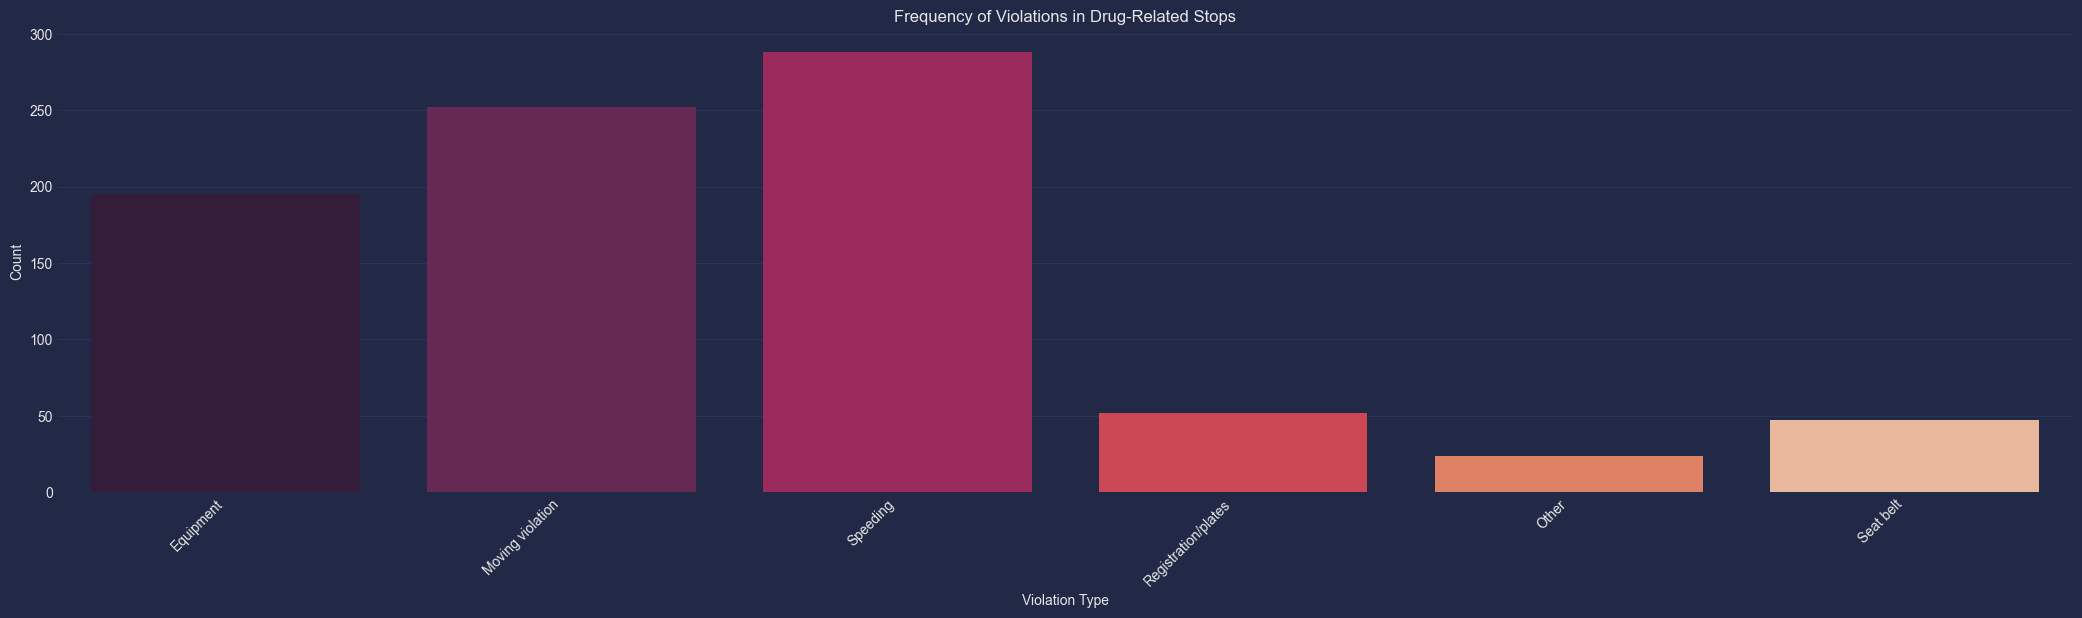

In [87]:
# Visualize the frequency of drug-related stops
plt.figure(figsize=(26, 6))
sns.countplot(x='violation', data=drug_related_stops, palette='rocket')
plt.title('Frequency of Violations in Drug-Related Stops')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

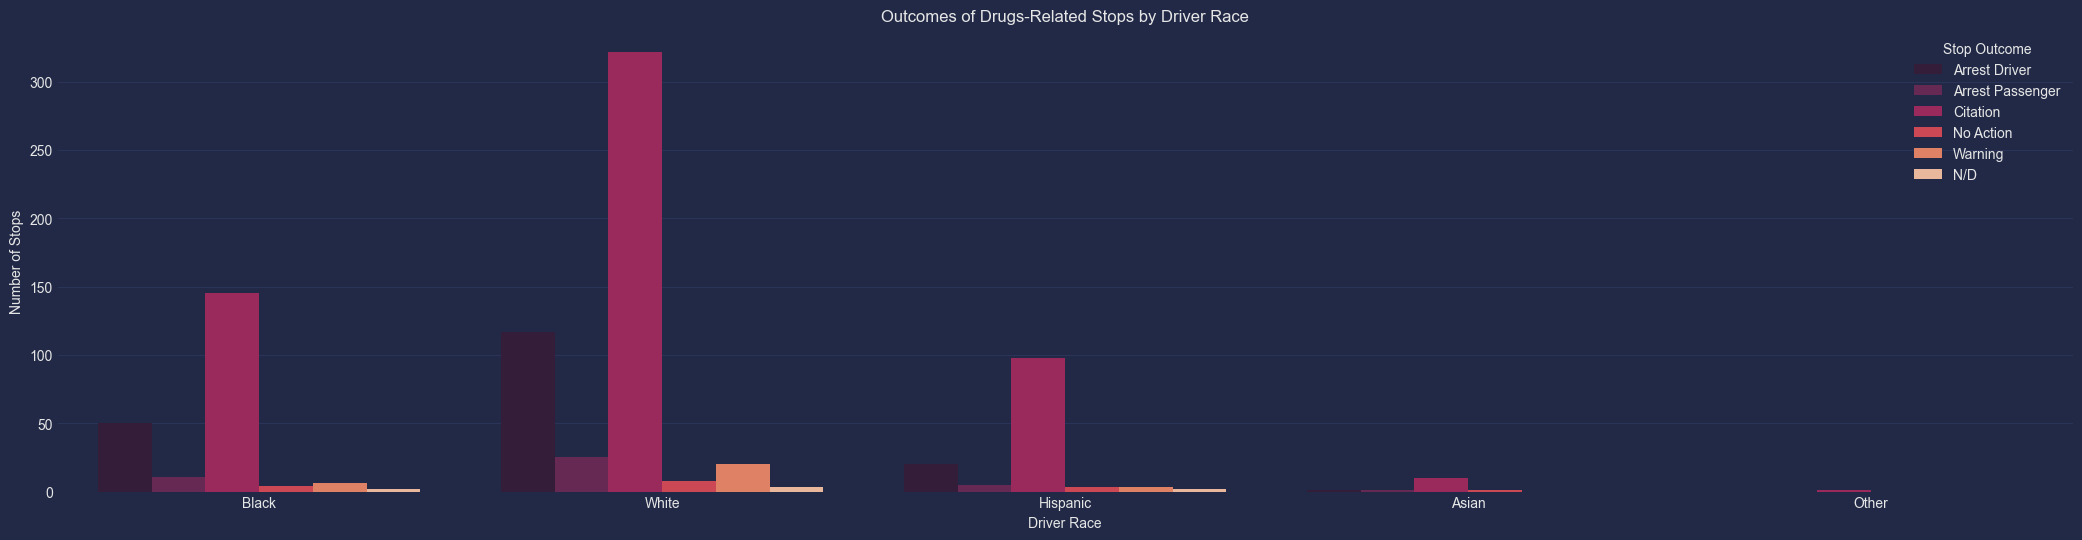

In [88]:
# Group by driver race and outcome of drugs-related stops
outcome_by_race = drug_related_stops.groupby(['driver_race', 'stop_outcome']).size().unstack()

# Plotting a stacked bar chart for outcomes of drugs-related stops by driver race using Seaborn
plt.figure(figsize=(26,6))
sns.countplot(x='driver_race', hue='stop_outcome', data=drug_related_stops, palette='rocket')
plt.title('Outcomes of Drugs-Related Stops by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Number of Stops')
plt.legend(title='Stop Outcome', loc='upper right')
plt.show()


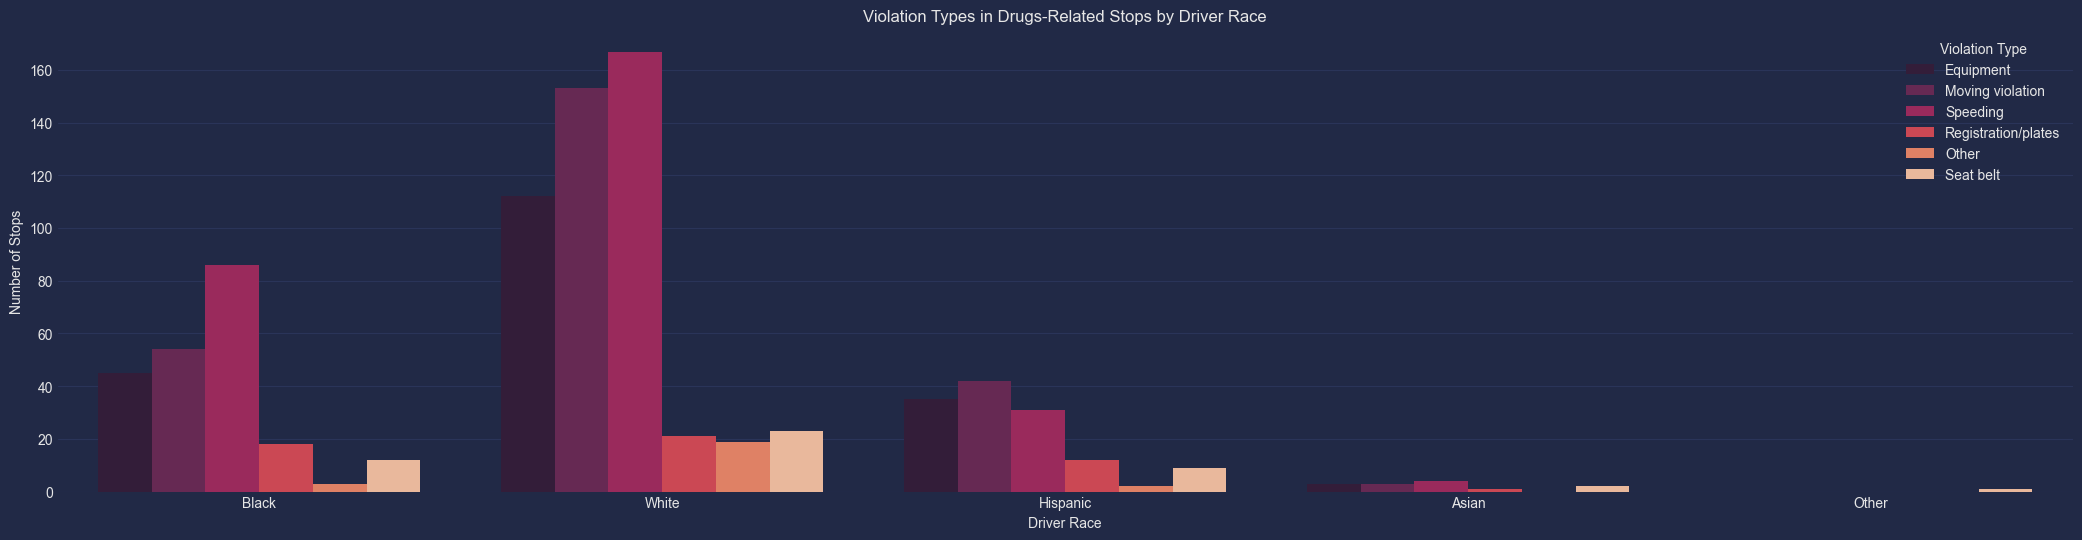

In [89]:
# Group by driver race and violation type for drugs-related stops
violation_by_race = drug_related_stops.groupby(['driver_race', 'violation']).size().unstack()

# Plotting a stacked bar chart for violation types in drugs-related stops by driver race using Seaborn
plt.figure(figsize=(26, 6))
sns.countplot(x='driver_race', hue='violation', data=drug_related_stops, palette='rocket')
plt.title('Violation Types in Drugs-Related Stops by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Number of Stops')
plt.legend(title='Violation Type', loc='upper right')
plt.show()

### 🚨💊 Calculate the annual rate of drug-related stops


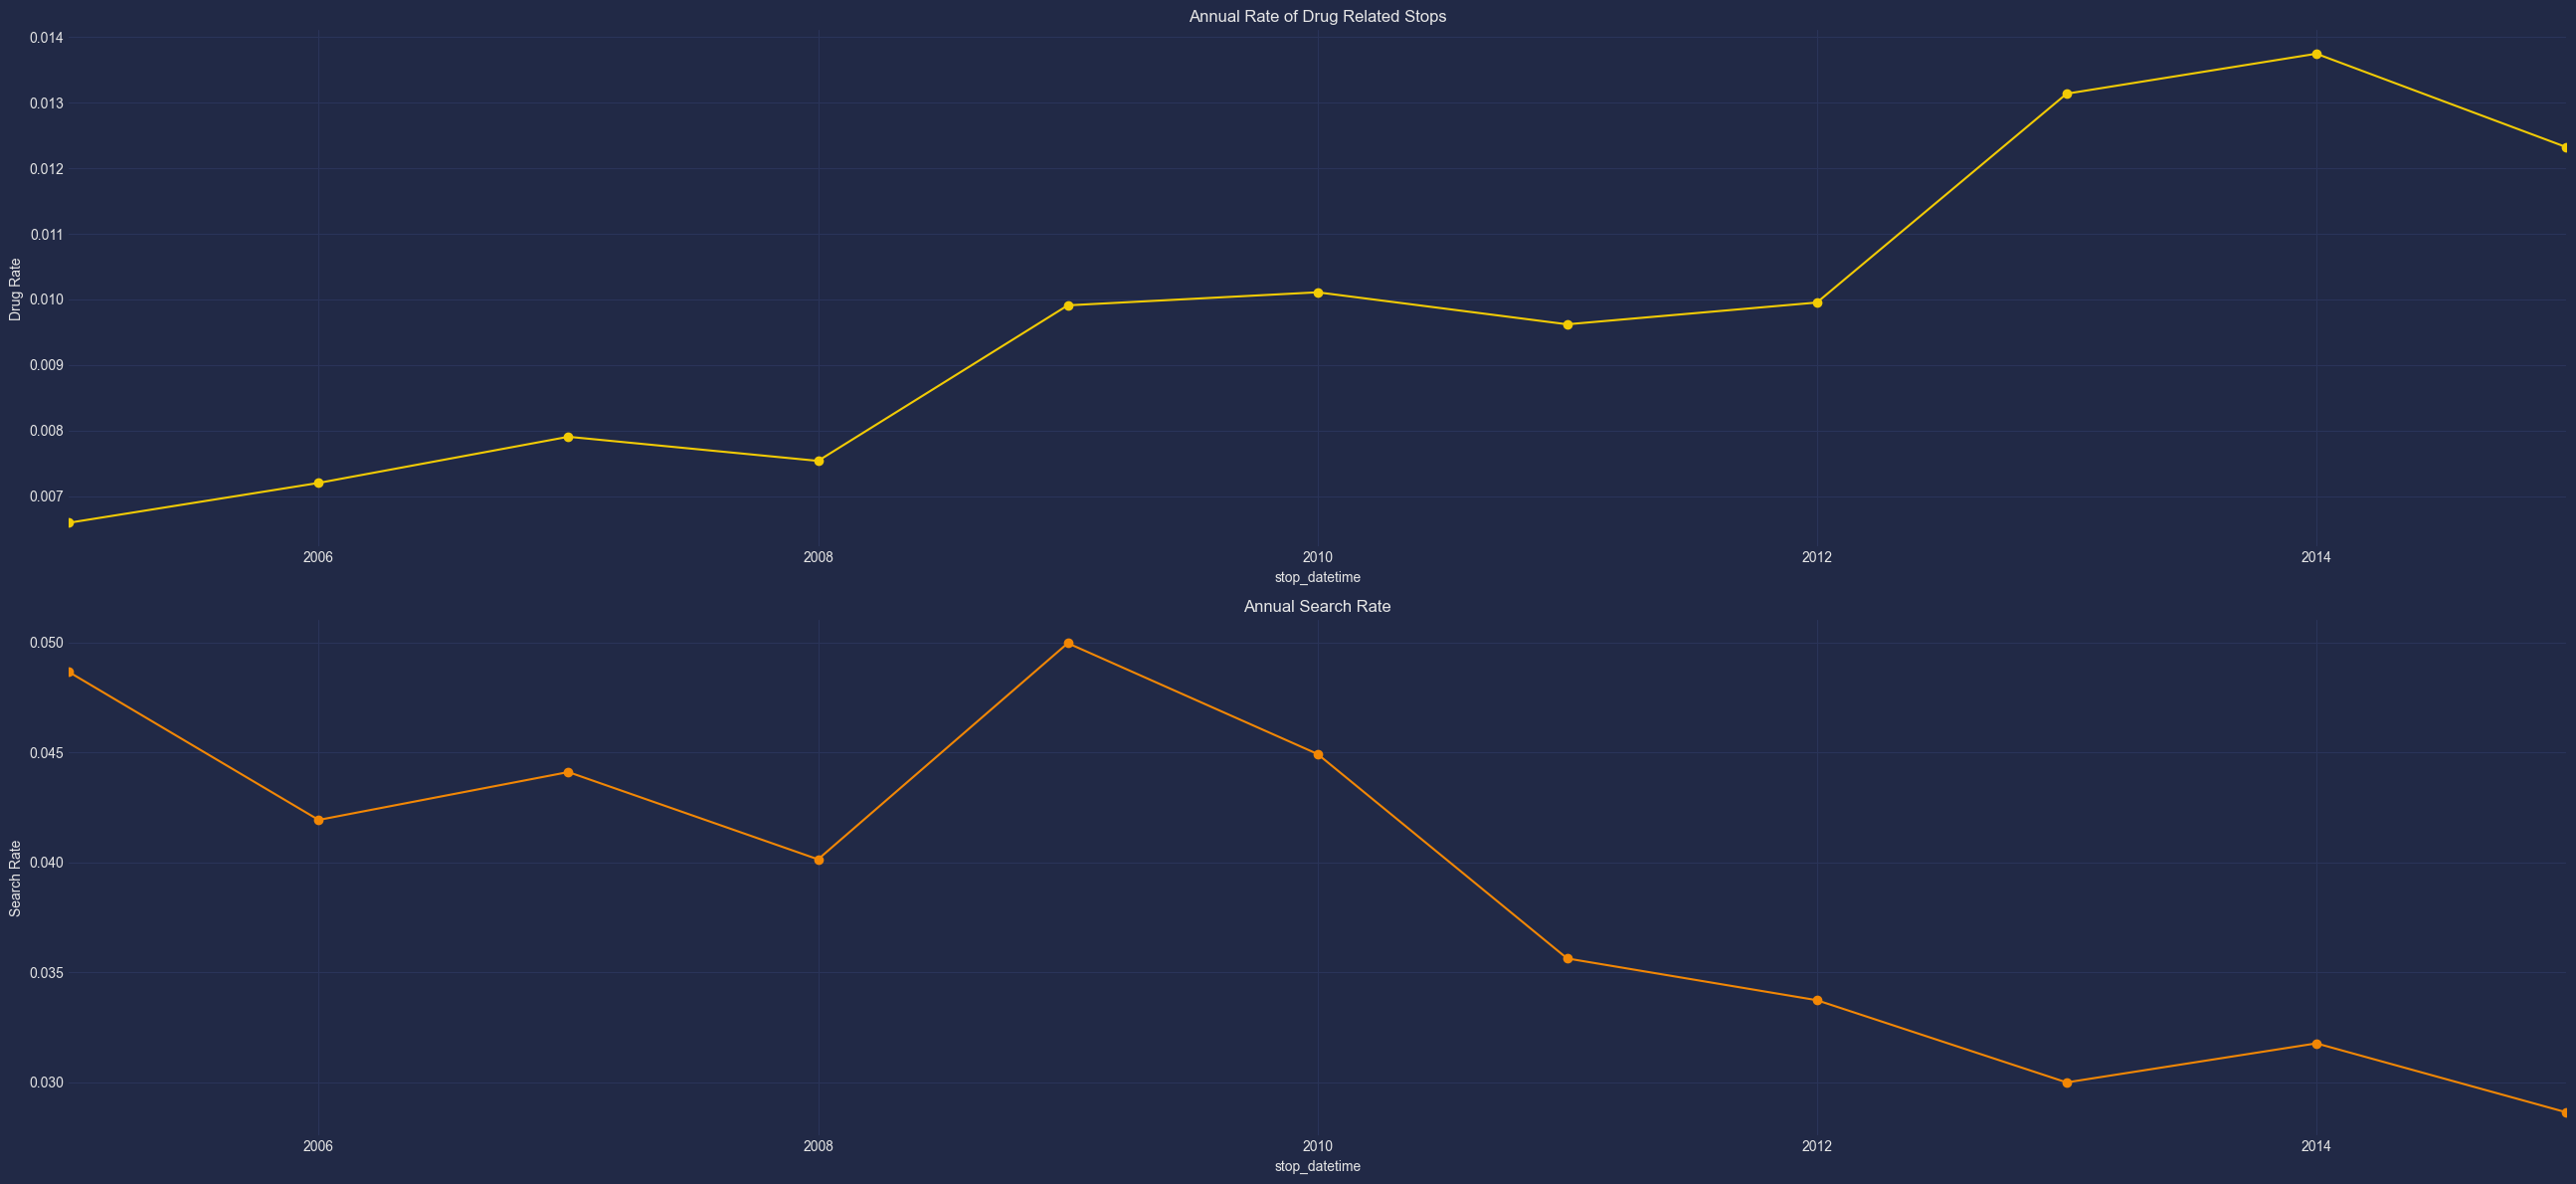

In [90]:
# Calculate and save the annual search rate
annual_search_rate = ri['search_conducted'].resample('A').mean()
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual_rates = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual_rates'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(26, 12))

# Plotting the first subplot (annual drug rate)
annual_rates['drugs_related_stop'].plot(ax=axes[0], marker='o', linestyle='-', color=color4)
axes[0].set_title('Annual Rate of Drug Related Stops')
axes[0].set_ylabel('Drug Rate')

# Plotting the second subplot (annual search rate)
annual_rates['search_conducted'].plot(ax=axes[1], marker='o', linestyle='-', color=color6)
axes[1].set_title('Annual Search Rate')
axes[1].set_ylabel('Search Rate')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the subplots
plt.show()

### District Analysis:

- Analyze the distribution of stops across different districts.🗺️🚨

- Are there districts with higher or lower stop rates?📊🔍


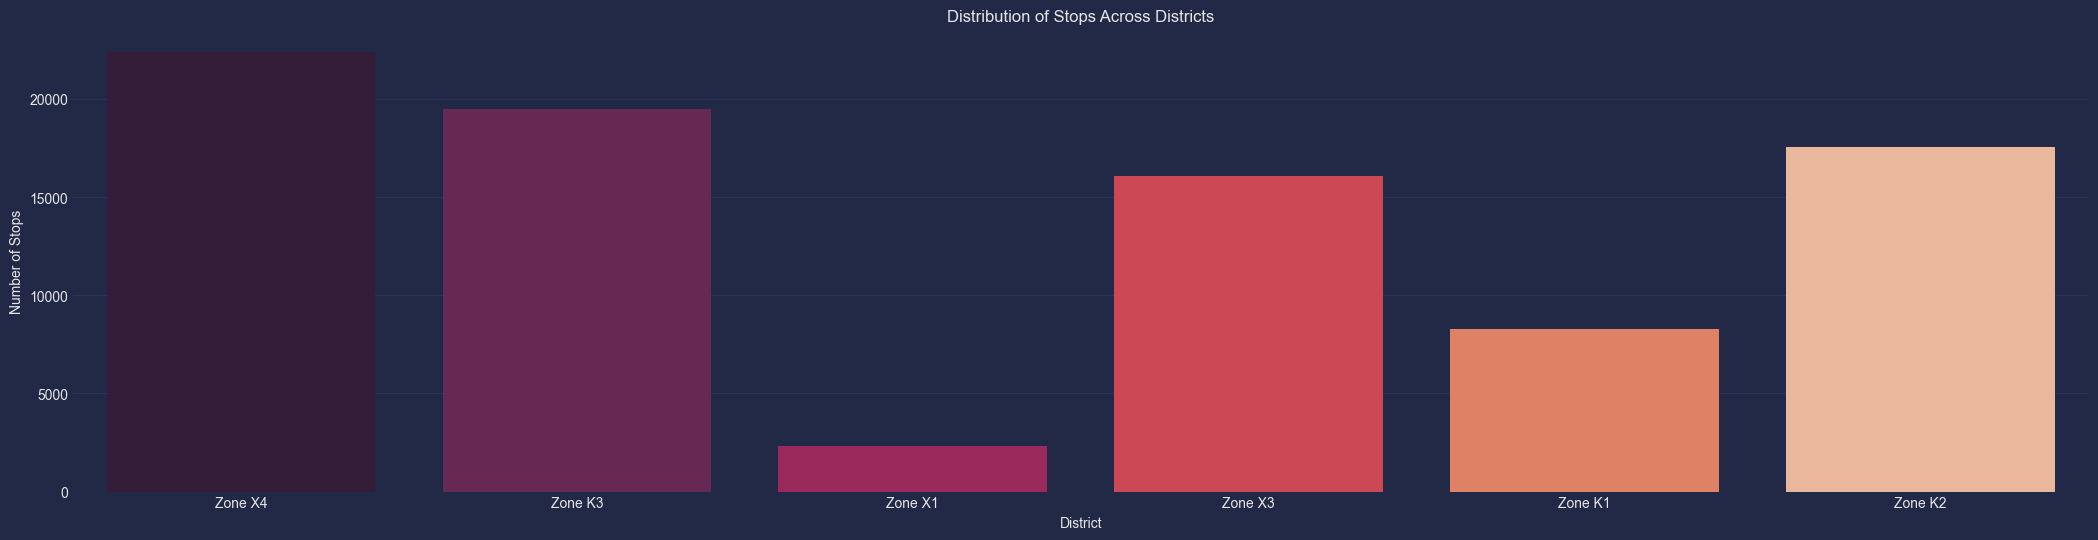

In [91]:
plt.figure(figsize=(26, 6))
sns.countplot(x='district', data=ri, palette='rocket')
# Plotting a bar chart for district-wise stop counts
plt.title('Distribution of Stops Across Districts')
plt.xlabel('District')
plt.ylabel('Number of Stops')
plt.show()

In [92]:
# Assuming the result of your groupby operation is stored in 'arrest_means'
arrest_means = ri.groupby(['district', 'driver_gender']).is_arrested.mean().unstack()
arrest_means

driver_gender,F,M
district,,
Zone K1,0.019208,0.026704
Zone K2,0.021885,0.033950
Zone K3,0.024483,0.034335
Zone X1,0.019685,0.024617
Zone X3,0.026871,0.037810
Zone X4,0.042271,0.049970


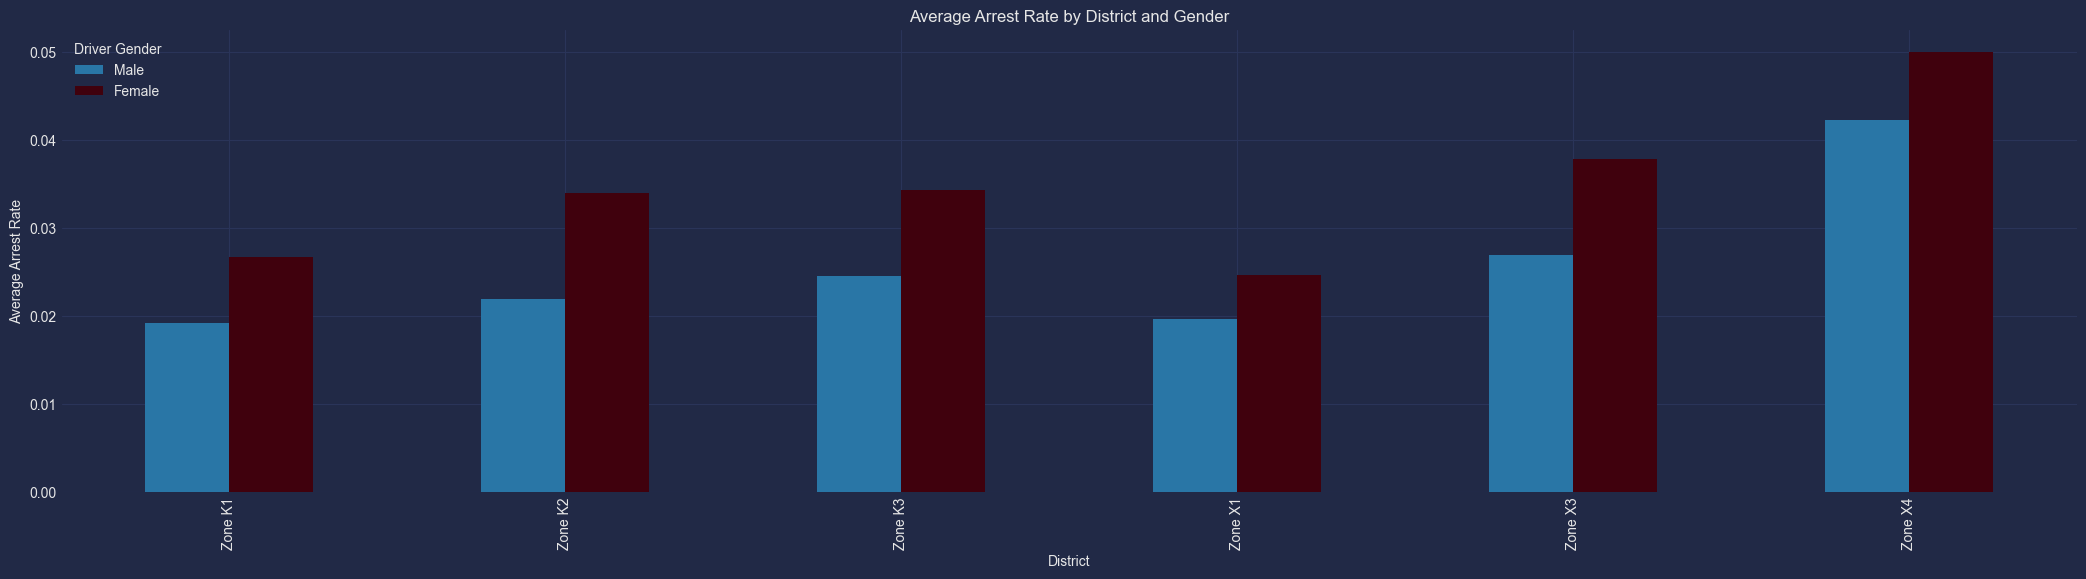

In [93]:
# Plotting a bar plot

arrest_means.plot(kind='bar', figsize=(26,6), color=colors_list[1::3])
plt.title('Average Arrest Rate by District and Gender')
plt.xlabel('District')
plt.ylabel('Average Arrest Rate')
plt.legend(title='Driver Gender', loc='upper left', labels=['Male', 'Female'])
plt.show()

In [94]:
ri.columns

Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop', 'district',
       'hour', 'stop_minutes'],
      dtype='object')

#  Let's analyze the weather dataset and show correlations.🌦️📊

In [95]:
weather = pd.read_csv('./weather.csv')

## Explore DataSet 🔍☁️

In [96]:
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


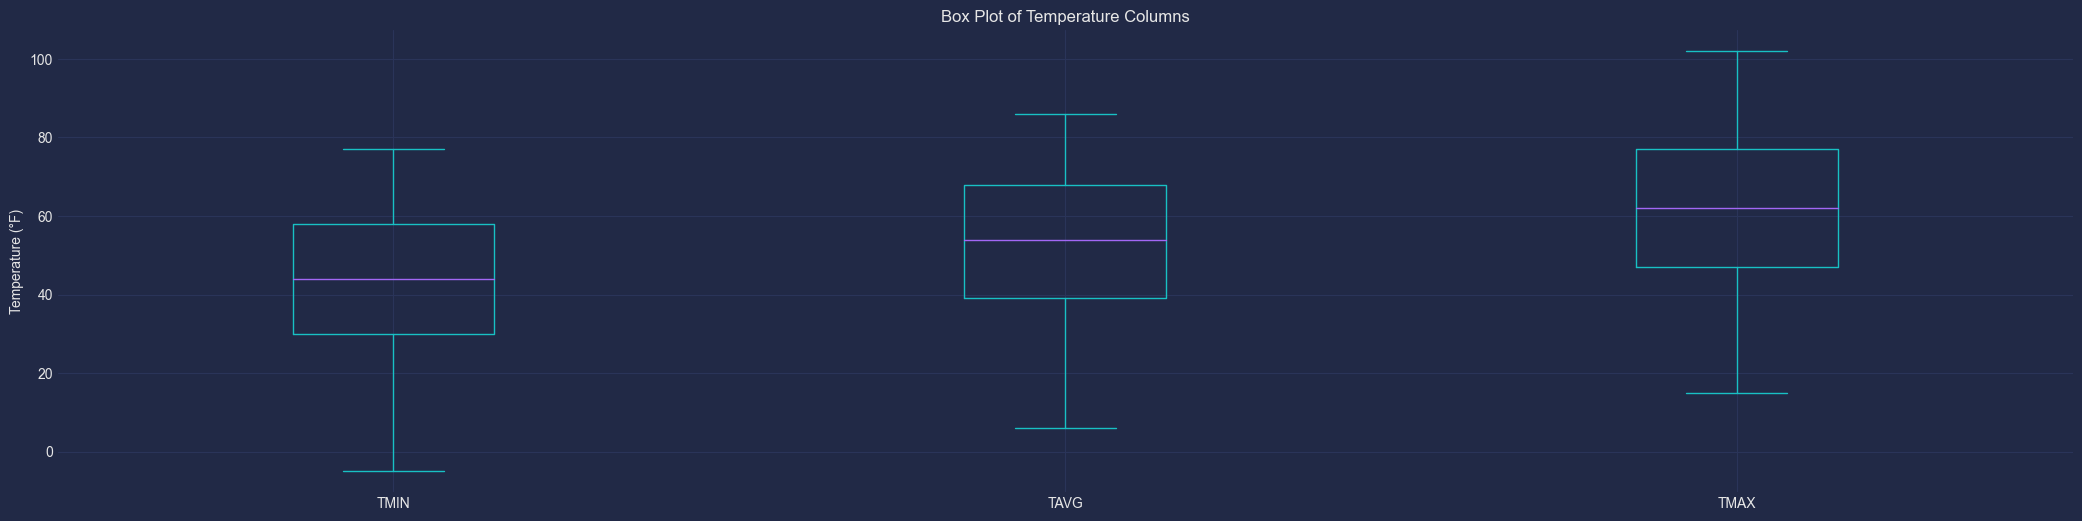

In [97]:
# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box', figsize=(26, 6))
plt.title('Box Plot of Temperature Columns')
plt.ylabel('Temperature (°F)')
plt.grid(True)

# Display the plot
plt.show()

temperature difference

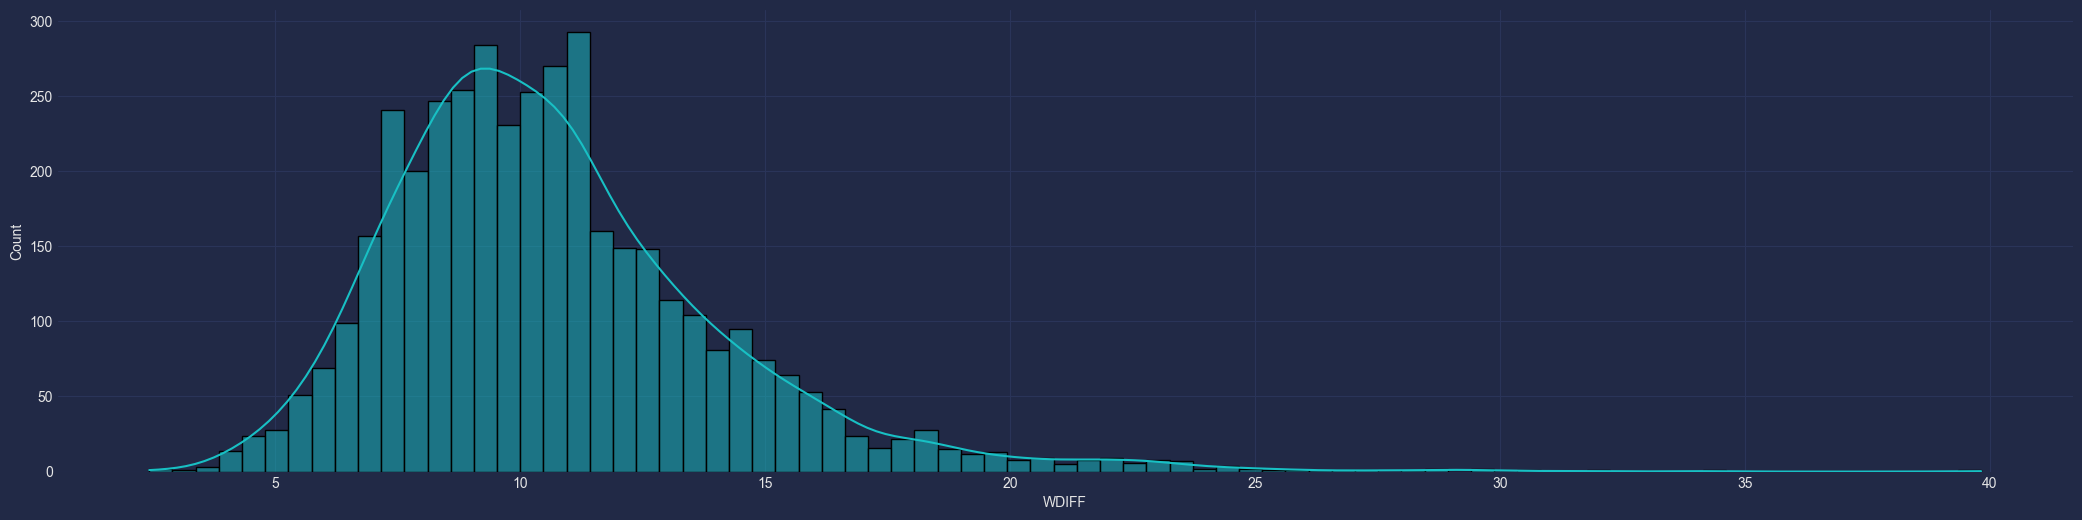

In [98]:
plt.figure(figsize=(26, 6))
weather['WDIFF'] = weather['WSF2'] - weather['AWND']

# Create a histogram of the 'WDIFF' column using Seaborn
sns.histplot(data=weather, x='WDIFF', kde=True)

# Display the plot
plt.show()

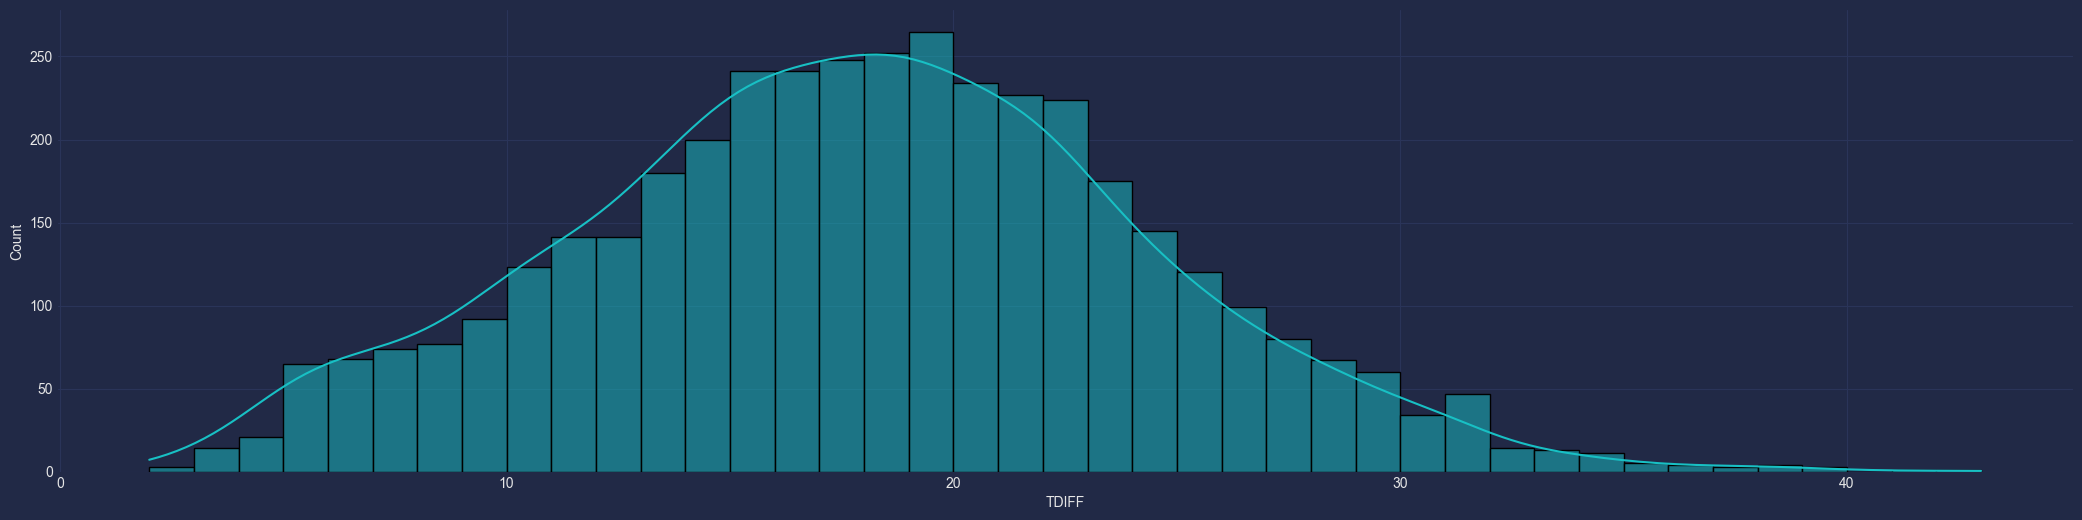

In [99]:
plt.figure(figsize=(26, 6))
weather['TDIFF'] = weather.TMAX - weather.TMIN
sns.histplot(data=weather, x='TDIFF', kde=True)
# Display the plot
plt.show()

Summarizing Weather Conditions: Creating a 'bad_conditions' Metric from 'WT01' through 'WT22'

In [100]:
#Copy 'WT01' through 'WT22' to a new DataFrame named 'WT'
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT' and store the results in a new column 'bad_conditions'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace any missing values in 'bad_conditions' with '0' (this step has been done for you)
weather['bad_conditions'] = weather['bad_conditions'].fillna(0).astype(int)



Analyzing and Categorizing Weather Conditions: Creating a Rating Scale from 'bad_conditions

In [101]:
# Create a dictionary that maps integers to strings
mapping = {0: 'good', 1: 'bad', 2: 'bad', 3: 'bad', 4: 'bad', 5: 'worse', 6: 'worse', 7: 'worse', 8: 'worse', 9: 'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather['bad_conditions'].map(mapping)

# Count the unique values in 'bad_conditions' and sort the index
print(weather['bad_conditions'].value_counts().sort_index())

# Count the unique values in 'rating'
print(weather['rating'].value_counts().sort_index())


0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


Changing the data type to category
Since the `rating` column only has a few possible values, you'll change its data type to category in order to store the data more efficiently.

In [102]:
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

weather['rating'] = weather.rating.astype(cats)
# Examine the head of 'rating'
print(weather['rating'].head(10))

0      bad
1      bad
2      bad
3      bad
4      bad
5    worse
6      bad
7    worse
8      bad
9      bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


##  Preparing the DataFrames🔄🗃️

In [110]:
# Reset the index of 'ri'
ri.reset_index( inplace=True)
ri.head(5)



,stop_datetime,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,hour,stop_minutes
0,2005-01-04 12:55:00,RI,2005-01-04,2024-02-29 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False,Zone X4,12,8
1,2005-01-23 23:15:00,RI,2005-01-23,2024-02-29 23:15:00,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone K3,23,8
2,2005-02-17 04:15:00,RI,2005-02-17,2024-02-29 04:15:00,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X4,4,8
3,2005-02-20 17:15:00,RI,2005-02-20,2024-02-29 17:15:00,M,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,Zone X1,17,23
4,2005-02-24 01:20:00,RI,2005-02-24,2024-02-29 01:20:00,F,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X3,1,8


In [107]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
weather_rating.head(6)

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad
5,2005-01-06,worse


In [105]:
# Convert 'DATE' column to datetime data type
weather['DATE'] = pd.to_datetime(weather['DATE'])


### Merging the DataFrames🔄🔄

In [111]:

ri_weather = pd.merge(left=ri, right=weather, left_on='stop_date', right_on='DATE', how='left')



# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)
ri_weather.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,...,WT16,WT17,WT18,WT19,WT21,WT22,WDIFF,TDIFF,bad_conditions,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,2024-02-29 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,Citation,False,...,1.0,NaN,NaN,NaN,NaN,NaN,9.17,6,4,bad
2005-01-23 23:15:00,RI,2005-01-23,2024-02-29 23:15:00,M,White,Speeding,Speeding,False,Citation,False,...,NaN,NaN,1.0,NaN,NaN,1.0,18.16,23,6,worse
2005-02-17 04:15:00,RI,2005-02-17,2024-02-29 04:15:00,M,White,Speeding,Speeding,False,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,6.95,10,0,good
2005-02-20 17:15:00,RI,2005-02-20,2024-02-29 17:15:00,M,White,Call for Service,Other,False,Arrest Driver,True,...,NaN,NaN,1.0,NaN,NaN,NaN,10.07,16,1,bad
2005-02-24 01:20:00,RI,2005-02-24,2024-02-29 01:20:00,F,White,Speeding,Speeding,False,Citation,False,...,NaN,NaN,1.0,NaN,NaN,NaN,6.93,11,3,bad


## Let's analyze and show correlations.🌦️📊

### Correlation between Weather and Stop Frequency:

🌡️🚦 - Is there a correlation between specific weather conditions (e.g., temperature, wind speed) and the frequency of traffic stops?

🌧️🔍 - Do certain weather types (WT01-WT22) coincide with an increase or decrease in policing activities?

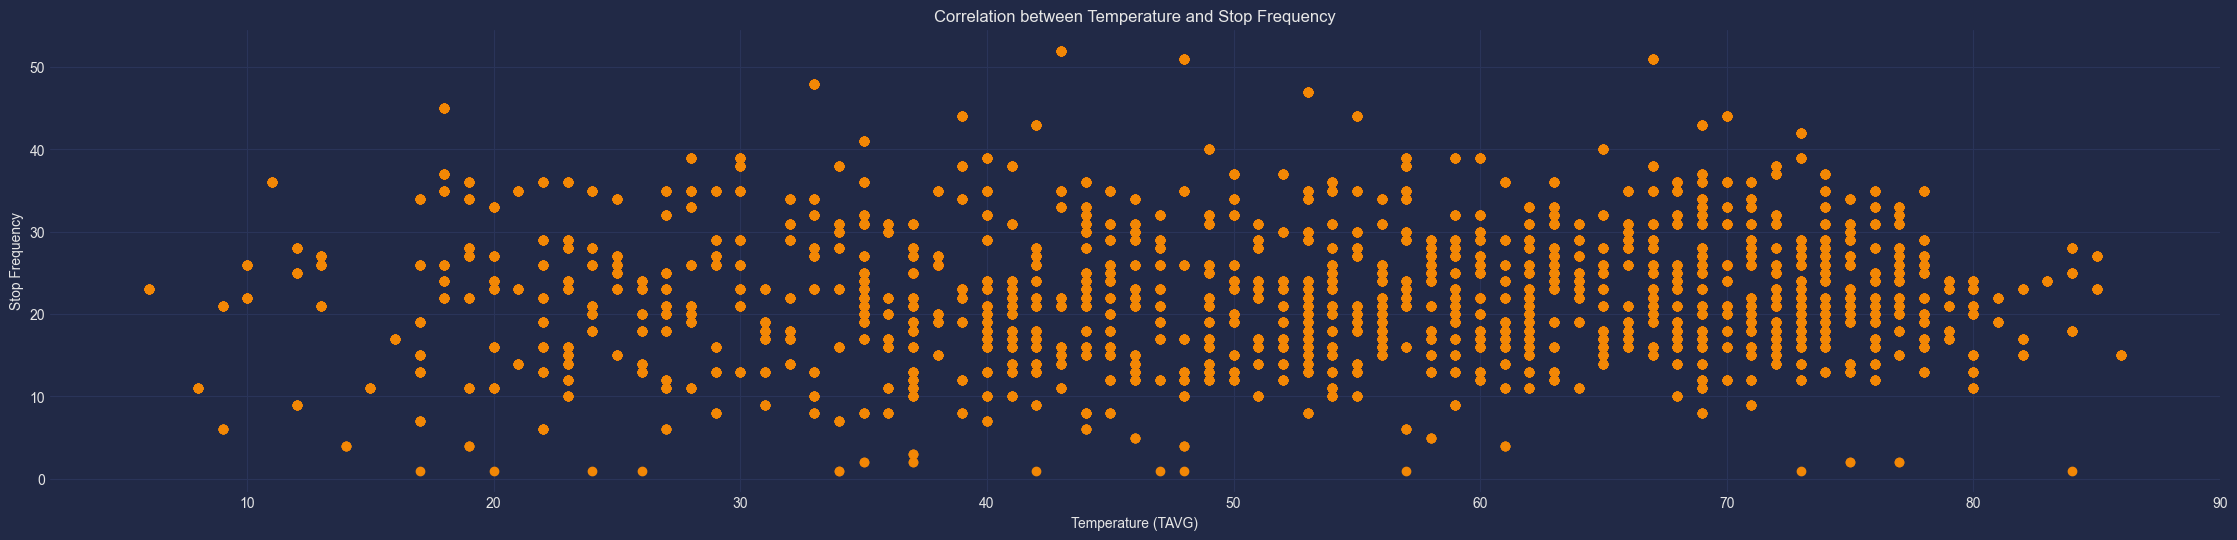

In [112]:
# Calculate stop frequency and assign it to the DataFrame
ri_weather['stop_frequency'] = ri_weather.groupby(by=['stop_date']).transform('size')

# Correlation between temperature and stop frequency
temperature_correlation = ri_weather['TAVG'].corr(ri_weather['stop_frequency'])

# Plotting temperature vs stop frequency
plt.figure(figsize=(28, 6))
plt.scatter(ri_weather['TAVG'], ri_weather['stop_frequency'],color=color6)
plt.title('Correlation between Temperature and Stop Frequency')
plt.xlabel('Temperature (TAVG)')
plt.ylabel('Stop Frequency')
plt.show()


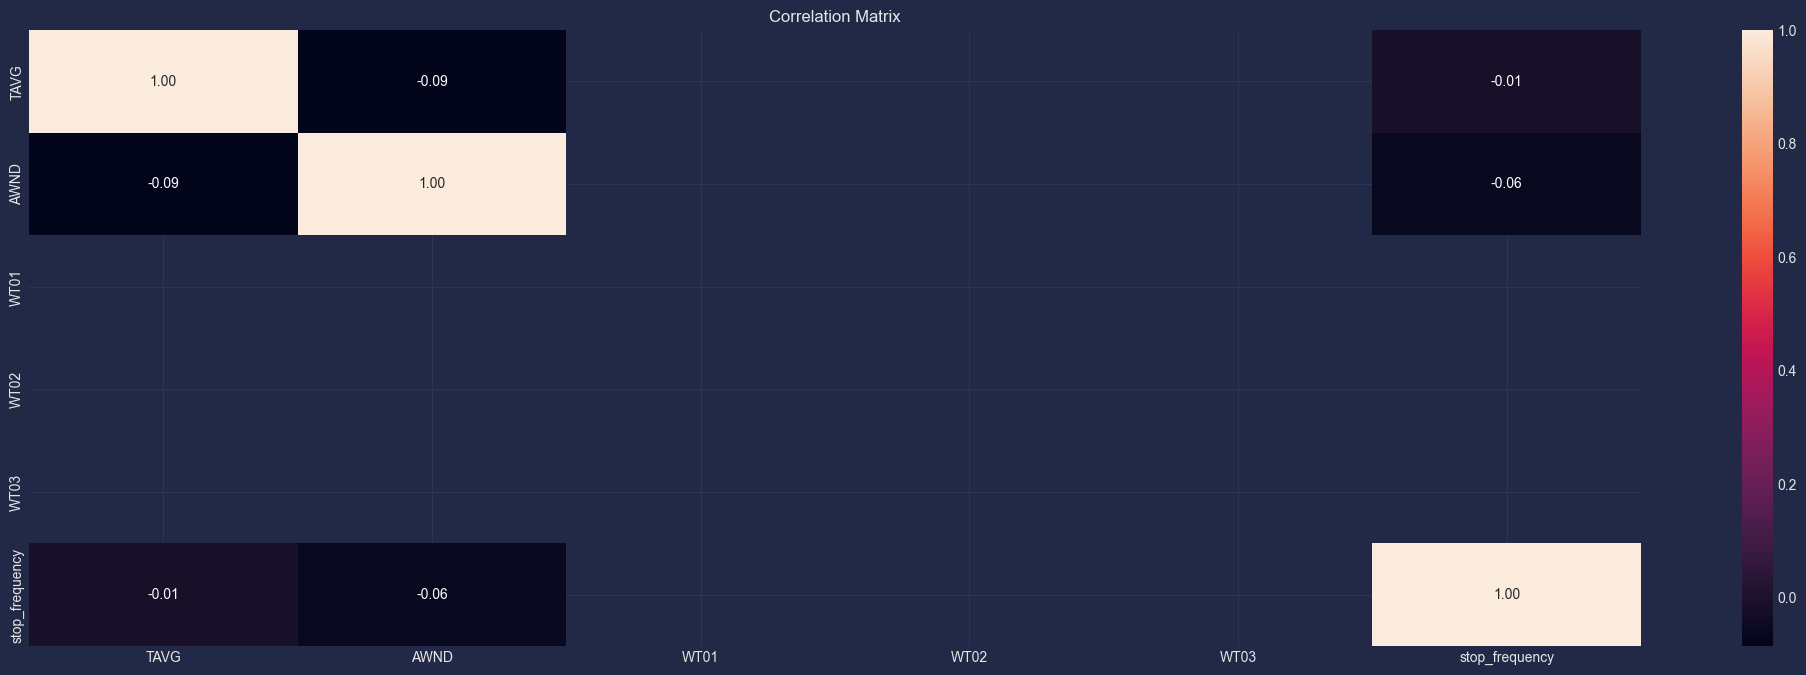

In [113]:
# Calculate the correlation matrix for selected variables
correlation_matrix = ri_weather[['TAVG', 'AWND', 'WT01', 'WT02', 'WT03', 'stop_frequency']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(26, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Impact of Extreme Weather on Policing:

 - How does extreme weather, such as heavy rain (WT03), snow (WT04), or strong winds (AWND, WSF2), affect the number of traffic stops?🌧️❄️💨

 - Are there changes in stop outcomes during extreme weather events? 🚦📊

In [ ]:
# Identify days with extreme weather events (e.g., heavy rain, snow, strong winds)
extreme_weather_days = ri_weather[(ri_weather['WT03'] == 1) | (ri_weather['WT04'] == 1) | (ri_weather['AWND'] > 20)]

# Count the number of traffic stops on extreme weather days
stops_on_extreme_weather_days = extreme_weather_days.groupby('DATE').size().reset_index(name='stop_count')

# Extract the year from the date
extreme_weather_days['YEAR'] = pd.to_datetime(extreme_weather_days['DATE']).dt.year

# Count the number of traffic stops on extreme weather days for each year
stops_on_extreme_weather_years = extreme_weather_days.groupby('YEAR').size().reset_index(name='stop_count')




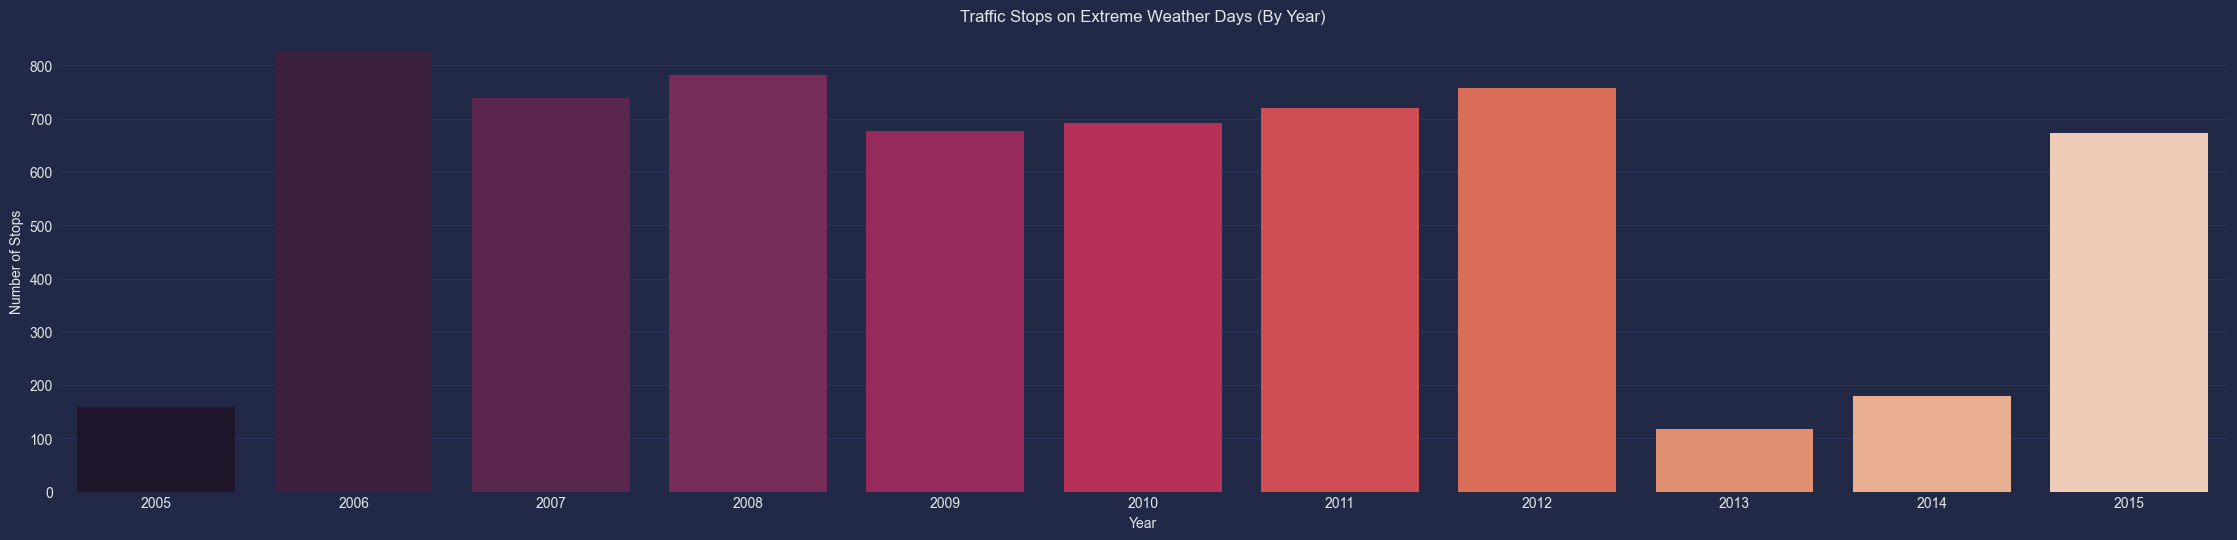

In [123]:
# Visualize the impact on stop frequency by year
plt.figure(figsize=(28, 6))
sns.barplot(x='YEAR', y='stop_count',palette='rocket', data=stops_on_extreme_weather_years)
plt.title('Traffic Stops on Extreme Weather Days (By Year)')
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.show()

### Temporal Patterns:

 - Analyze if there are temporal patterns in policing activities based on weather conditions (e.g., more stops during specific seasons or times of the day).📆🌦️

 - How do these patterns correlate with temperature variations? 🌡️🔄 

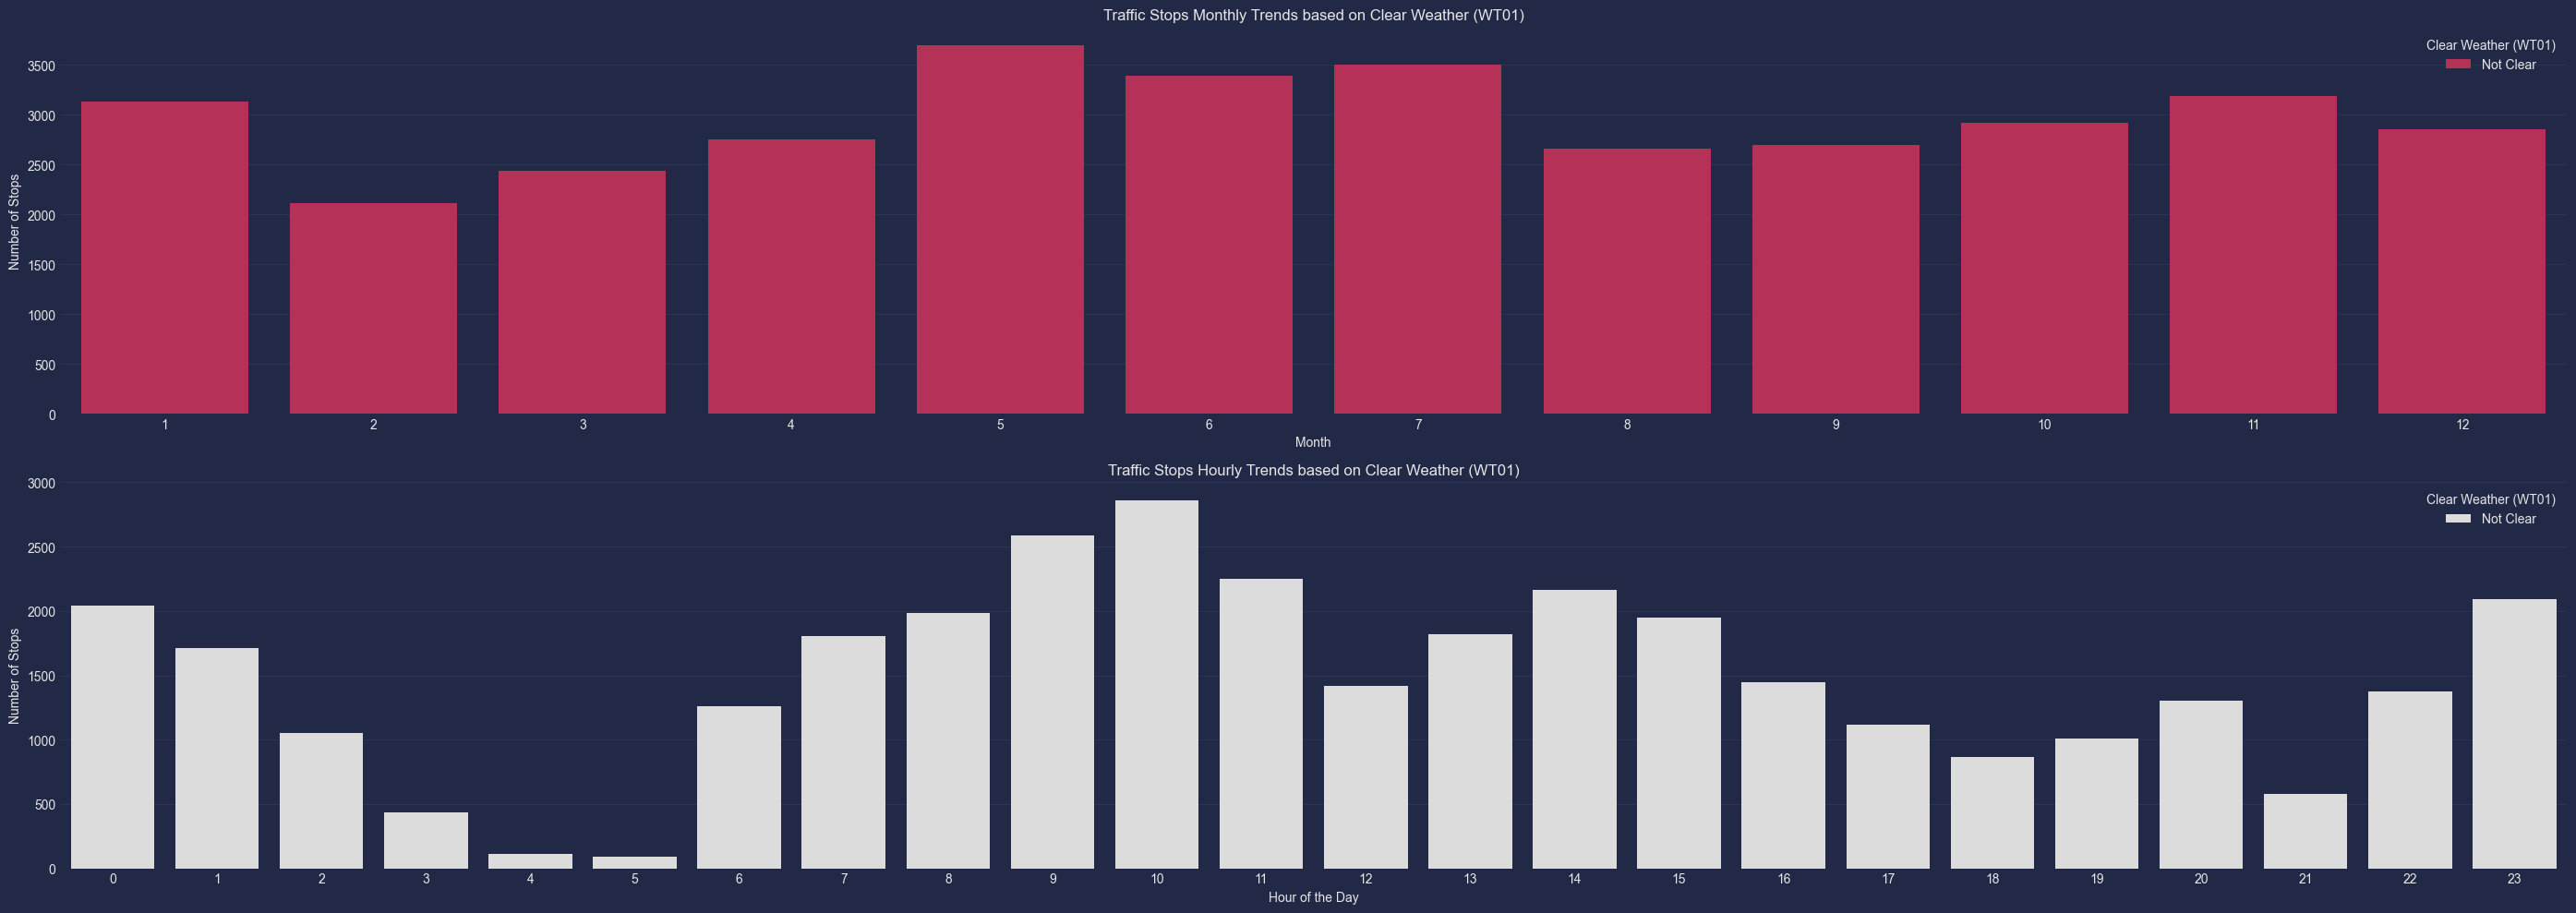

In [145]:
# Extract the month and hour from the date
ri_weather['Month'] = pd.to_datetime(ri_weather['DATE']).dt.month
ri_weather['Hour'] = pd.to_datetime(ri_weather['stop_time']).dt.hour

# Plotting temporal patterns based on weather conditions
plt.figure(figsize=(28, 10))

# Plotting stops per month
plt.subplot(2, 1, 1)
sns.countplot(x='Month', data=ri_weather, hue='WT01',palette='rocket')
plt.title('Traffic Stops Monthly Trends based on Clear Weather (WT01)')
plt.xlabel('Month')
plt.ylabel('Number of Stops')
plt.legend(title='Clear Weather (WT01)', labels=['Not Clear', 'Clear'])

# Plotting stops per hour
plt.subplot(2, 1, 2)
sns.countplot(x='Hour', data=ri_weather, hue='WT01', palette='coolwarm')
plt.title('Traffic Stops Hourly Trends based on Clear Weather (WT01)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Stops')
plt.legend(title='Clear Weather (WT01)', labels=['Not Clear', 'Clear'])

plt.tight_layout()
plt.show()